# TRABAJO FIN DE MASTER - PABLO GARCIA LOPERA - 2021

#  ESTUDIO SOBRE EL COVID-19 EN COREA DEL SUR - 2020

### LIBRERÍAS

In [ ]:
## 1. BÁSICAS

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

## 2. FUENTES Y GRÁFICOS

plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = (13, 7)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 13})
color_list = ['#8DD3C7', '#FEFFB3', '#BFBBD9'
              , '#FA8174', '#81B1D2', '#FDB462'
              , '#B3DE69', '#BC82BD', '#CCEBC4']

### FUNCIONES

In [ ]:
# CÁLCULO DE DÍAS ENTRE DOS FECHAS
def restar_fechas(fecha_cad1, fecha_cad2):
    dia_ini = datetime.datetime.strptime(fecha_cad1, '%Y-%m-%d')
    dia_fin = datetime.datetime.strptime(fecha_cad2, '%Y-%m-%d')
    diff = dia_fin - dia_ini
    return diff.days

## VARIOS GRÁFICOS EN 1 GRÁFICO
def plot_groupby(data, groupby, column, title, ylabel=None, axis=None):
    """
    PARÁMETROS
        data = dataframe
        groupby(string) = nombre de columna por la que se agrupa
        column(string) = nombre de columna para el eje y
        title(string) = título del gráfico
        axis = eje del gráfico
    """
    fig, ax = plt.subplots(figsize=(11, 7))
    plt.title(f'{title}', fontsize=20)
    ax.set_xlabel('Fecha', size=20)
    if ylabel == None:
        ax.set_ylabel('Número de Casos', size=20)
    else:
        ax.set_ylabel(ylabel, size=20)
    group_list = data.groupby(groupby)
    for group in group_list:
        if axis == None:
            plt.plot(group[1].date.values
                     , group[1][column].values
                     , label=group[0])
        else:
            axis.plot(group[1].date.values
                     , group[1][column].values
                     , label=group[0])
    tick_num = 12
    ax.set_xticks(ax.get_xticks()[::int(len(edades_temp.date.unique())/tick_num)+1])
    ax.legend()
    plt.show()

# 1.ANÁLISIS POR EDADES/POBLACIÓN

En este apartado vamos a analizar los datos epidemiológicos por rangos de Edades. Disponemos del fichero **TimeAge.csv**, con datos de los pacientes confirmados y fallecidos, por fecha y rangos de edades, que contiene los siguientes campos:

- **date**: Tipo Fecha. Indica la fecha en la que se detectaron los casos
- **time**: Tipo Hora. Indica la Hora en la que ocurrieron los casos
- **age**: Tipo Alfanumérico. Indica que rango de edad pertenece la persona infectada
- **confirmed**: Tipo Numérico. Cantidad de casos confirmados (infectados)
- **deceased**: Tipo Numérico. Cantidad de fallecidos

## 1.1 ANÁLISIS POR EDADES

### PREPARACIÓN DE LOS DATOS

CARGAMOS EL FICHERO **TimeAge.csv**

In [ ]:
# CARGAR DATOS DEL FICHERO TimeAge.csv
from google.colab import files

uploaded = files.upload()

for TimeAge in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=TimeAge, length=len(uploaded[TimeAge])))

Saving TimeAge.csv to TimeAge.csv
User uploaded file "TimeAge.csv" with length 20364 bytes


Crearemos el dataframe **edades_temp**, con datos de **91** días de los pacientes confirmados y fallecidos, por rangos de edades.

**Rango de Fechas**: 2020-03-02 a 2020-05-31

**Rangos de edades**: '0s' '10s' '20s' '30s' '40s' '50s' '60s' '70s' '80s'

En el último día **2020-05-31** tenemos los datos totales (valor acumulado)

In [ ]:
# CARGAMOS LOS DATOS AL DATAFRAME "edades_temp"
import pandas as pd
import io
edades_temp = pd.read_csv(io.StringIO(uploaded[TimeAge].decode('utf-8')))
edades_temp

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
814,2020-05-31,0,40s,1521,3
815,2020-05-31,0,50s,2039,15
816,2020-05-31,0,60s,1405,39
817,2020-05-31,0,70s,725,80


**DATOS BÁSICOS**

In [ ]:
d1_1 = edades_temp.min().date
d2_1 = edades_temp.max().date
print('PERIODO: desde ', d1_1, 'al ', d2_1)
print('Nº DE DÍAS: ', restar_fechas(d1_1, d2_1))
print('Nº DE REGISTROS: ', len(edades_temp.index))
print('Nº DE CAMPOS: ', len(edades_temp.columns))
print('RANGOS DE EDADES: ', edades_temp.age.unique())
edades_temp.dtypes

PERIODO: desde  2020-03-02 al  2020-05-31
Nº DE DÍAS:  90
Nº DE REGISTROS:  819
Nº DE CAMPOS:  5
RANGOS DE EDADES:  ['0s' '10s' '20s' '30s' '40s' '50s' '60s' '70s' '80s']


date         object
time          int64
age          object
confirmed     int64
deceased      int64
dtype: object

Creamos el Dataframe con los casos TOTALES por edades y lo llamaremos **totales_edades**

In [ ]:
totales_edades = edades_temp[edades_temp.date.isin([edades_temp.max().date])]
#totales_edades = totales_edades[["age"]]
totales_edades.head(10)

,date,time,age,confirmed,deceased
810,2020-05-31,0,0s,157,0
811,2020-05-31,0,10s,655,0
812,2020-05-31,0,20s,3176,0
813,2020-05-31,0,30s,1292,2
814,2020-05-31,0,40s,1521,3
815,2020-05-31,0,50s,2039,15
816,2020-05-31,0,60s,1405,39
817,2020-05-31,0,70s,725,80
818,2020-05-31,0,80s,498,131


Cálculo de Total Confirmados y Fallecidos por Edades

In [ ]:
print('TOTAL DE CONFIRMADOS:', totales_edades.sum().confirmed)
print('TOTAL DE FALLECIDOS:', totales_edades.sum().deceased)

TOTAL DE CONFIRMADOS: 11468
TOTAL DE FALLECIDOS: 270


Vamos a crear una datframe con los datos agrupados por Rango de Edad y crearemos los campos calculados: **conf_ratio** y **falle_ratio**:

- **conf_ratio** =  (Total Casos Confirmados por Edad)/(Total Casos Confirmados)  *100
- **falle_ratio** =   (Total Casos Fallecidos por Edad)/(Total Casos Fallecidos)  *100

In [ ]:
## DATAFRAME DATOS AGRUPADOS POR EDAD "edades_agrupado"

edades_agrupado = pd.DataFrame()
edades_agrupado['edad'] = totales_edades.age
edades_agrupado['confirmados'] = totales_edades.confirmed
# CÁLCULO DEL RATIO DE CONFIRMADOS
edades_agrupado['conf_ratio'] = round(totales_edades['confirmed']/sum(totales_edades['confirmed']) * 100, 2)
edades_agrupado['fallecidos'] = totales_edades.deceased
# CÁLCULO DEL RATIO DE FALLECIDOS#
edades_agrupado['falle_ratio'] = round(totales_edades['deceased']/sum(totales_edades['deceased']) * 100, 2)

#edades_agrupado['edad'] = ('0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s')
display(edades_agrupado)

,edad,confirmados,conf_ratio,fallecidos,falle_ratio
810,0s,157,1.37,0,0.00
811,10s,655,5.71,0,0.00
812,20s,3176,27.69,0,0.00
813,30s,1292,11.27,2,0.74
814,40s,1521,13.26,3,1.11
815,50s,2039,17.78,15,5.56
816,60s,1405,12.25,39,14.44
817,70s,725,6.32,80,29.63
818,80s,498,4.34,131,48.52


### ANALÍTICA DESCRIPTIVA

#### **Casos por Rangos de Edad**

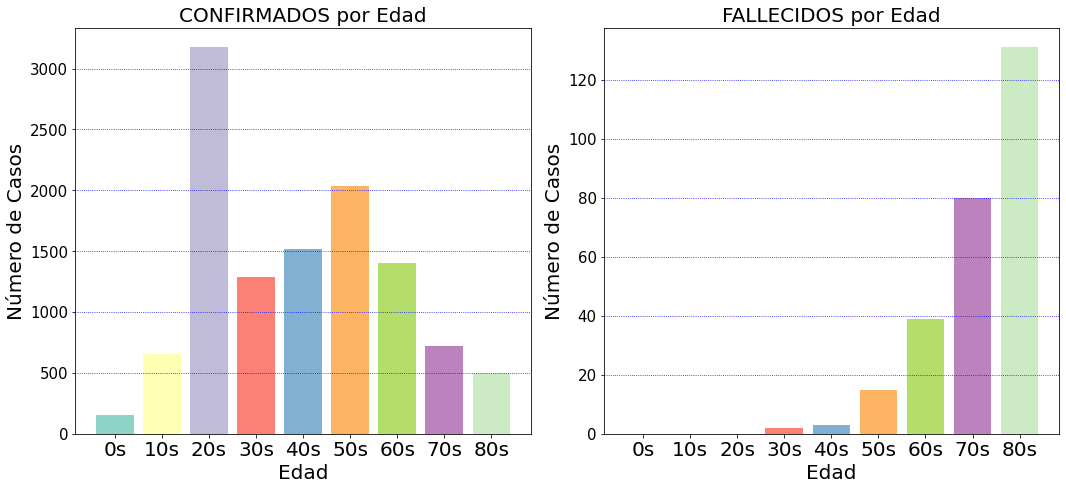

In [ ]:
# GRÁFICOS DE BARRAS - CASOS AGRUPADOS POR RANGO DE EDADES
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# GRÁFICO - CONFIRMADOS
axes[0].set_title('CONFIRMADOS por Edad', fontsize=20)
axes[0].bar(edades_agrupado.edad, edades_agrupado.confirmados, color=color_list)
axes[0].set_xlabel('Edad', size=20)
axes[0].tick_params(axis="x", labelsize=20)
axes[0].tick_params(axis="y", labelsize=15) 
axes[0].set_ylabel('Número de Casos', size=20)
axes[0].grid(axis='y',linestyle='dotted', color='b')

# GRÁFICO - FALLECIDOS
axes[1].set_title('FALLECIDOS por Edad', fontsize=20)
axes[1].bar(edades_agrupado.edad, edades_agrupado.fallecidos, color=color_list)
axes[1].set_xlabel('Edad', size=20)
axes[1].tick_params(axis="x", labelsize=20)
axes[1].tick_params(axis="y", labelsize=15) 
axes[1].set_ylabel('Número de Casos', size=20)
axes[1].grid(axis='y',linestyle='dotted', color='b')

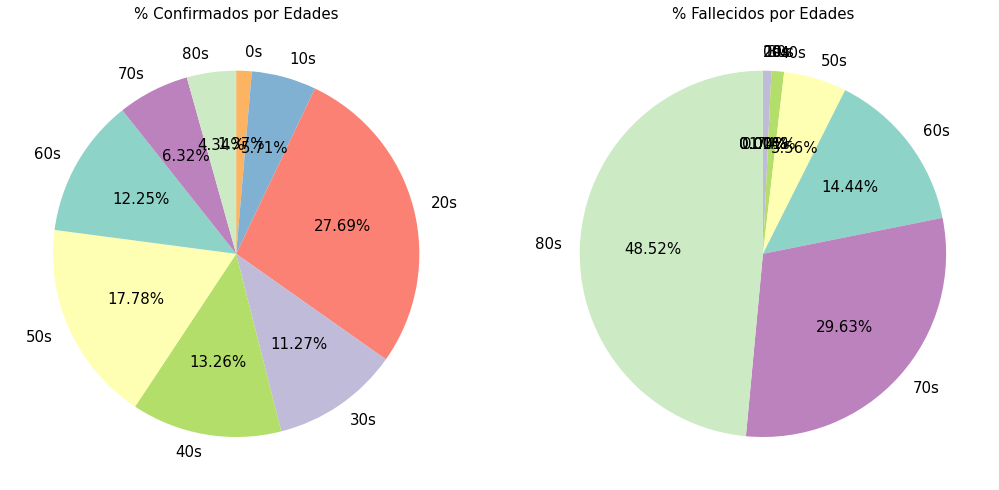

In [ ]:
# GRÁFICOS DE SECTORES - CASOS AGRUPADOS POR RANGO DE EDADES

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

color_pie = [color_list[5], color_list[4], color_list[3]
             , color_list[2], color_list[6], color_list[1]
             , color_list[0], color_list[7], color_list[8]]

# GRÁFICO - CONFIRMADOS
axes[0].set_title('% Confirmados por Edades', fontsize=15)
pop_circle = plt.Circle((0,0), 0.30, color='white')
axes[0].pie(edades_agrupado.confirmados
        , labels = edades_agrupado.edad
        , autopct = '%.2f%%'
        , colors = color_pie
        , startangle=90
        , counterclock=False
        , textprops={'fontsize': 15})
p=plt.gcf()

# GRÁFICO - FALLECIDOS
axes[1].set_title('% Fallecidos por Edades', fontsize=15)
pop_circle = plt.Circle((0,0), 0.30, color='white')
axes[1].pie(edades_agrupado.fallecidos
        , labels = edades_agrupado.edad
        , autopct = '%.2f%%'
        , colors = color_pie
        , startangle=90
        , counterclock=False
        , textprops={'fontsize': 15})
p=plt.gcf()
#p.gca().add_artist(pop_circle)

En el gráfico de **Confirmados** se puede observar, que el mayor número de personas confirmadas o contagiadas, corresponden al intervalo de **20s**. Posibles motivos que explicarían esto, serían:

1. Mayor vida social y movilidad. Por ejemplo, la universidad, citas, conciertos, botellones, discotecas...
2. Mayor actividad de relaciones sentimentales y sexuales.
3. Al no presentar síntomas en la gran mayoría de los casos, y pasar la enfermedad como una simple gripe, la noción de peligrosidad disminuye, aunque el "riesgo de contagio siga ahí". Esto podría hacer que tomen menos en serio los esfuerzos de contención (como la cuarentena y el distanciamiento social).

En cambio, si analizamos el gráfico de **fallecidos**, vemos que la mayor parte de los fallecidos corresponden al rango de edad **80s**. Siendo en los rangos **60s**, **70s** y **80s**, dónde se concentran los fallecidos. Los porcentajes de los rangos **60s**, **70s** y **80s** son 14,82 + 30,07 + 46,81 = **91,7 %**


## 1.2 ANÁLISIS POR EDADES vs POBLACIÓN

### PREPARACIÓN DE LOS DATOS

Vamos a crear una dataframe llamado **edades_poblacion** con los datos totales de casos por Rango de Edad y añadimos los datos de población de Corea del Sur en 2020, obteniendolos de fuente externa KOSIS: http://kosis.kr/visual/populationKorea/experienceYard/populationPyramid.do?mb=N&menuId=M_3_2. Quitamos los campos **date** y **time** que no son necesarios. 

Crearemos los campos calculados: 

- **conf_ratio** =  (Total Casos Confirmados por Edad)/(Total Casos Confirmados)  *100
- **falle_ratio** =   (Total Casos Fallecidos por Edad)/(Total Casos Fallecidos)  *100
- **pobla_ratio** = (Total Población por Edad)/(Total Población)  *100
-  **confpob_ratio** =  (Total Casos Confirmados por Edad)/(Total Población por Edad)  *100
- **decpob_ratio** =  (Total Casos Fallecidos por Edad)/(Total Población por Edad)  *100

Para ver mejor la relación entre confirmados y fallecidos, vamos a calcular la ratio de fallecidos frente al de confirmados:

- **falle_conf_ratio** =  (Total Casos Fallecidos por Edad)/(Total Confirmados por Edad)  *100

In [ ]:
edades_poblacion = pd.DataFrame()

edades_poblacion['edad'] = totales_edades.age
edades_poblacion['confirmados'] = totales_edades.confirmed
# CÁLCULO DEL RATIO DE CONFIRMADOS
edades_poblacion['conf_ratio'] = round(edades_poblacion['confirmados']/sum(edades_poblacion['confirmados']) * 100, 2)
edades_poblacion['fallecidos'] = totales_edades.deceased
# CÁLCULO DEL RATIO DE FALLECIDOS#
edades_poblacion['falle_ratio'] = round(edades_poblacion['fallecidos']/sum(edades_poblacion['fallecidos']) * 100, 2)
# AÑADIMOS LAS POBLACIONES POR EDAD OBTENIDAS DE LA WEB
edades_poblacion['poblacion'] = (4055740, 4732100, 6971785, 7203550, 8291728, 8587047, 6472987, 3591533, 1874109)
# CÁLCULO DEL RATIO DE POBLACIÓN POR EDAD
edades_poblacion['pobla_ratio'] = round(edades_poblacion['poblacion']/sum(edades_poblacion['poblacion']) * 100, 2)
# CÁLCULO DEL RATIO DE CONFIRMADOS POR POBLACIÓN Y EDAD
edades_poblacion['confpob_ratio'] = round(edades_poblacion['confirmados']/edades_poblacion['poblacion'] * 100, 3)
# CÁLCULO DEL RATIO DE FALLECIDOS POR POBLACIÓN Y EDAD
edades_poblacion['decpob_ratio'] = round(edades_poblacion['fallecidos']/edades_poblacion['poblacion'] * 100, 3)

edades_poblacion['falle_conf_ratio '] = round(edades_poblacion['fallecidos']/edades_poblacion['confirmados'] * 100, 3)

edades_poblacion = edades_poblacion.sort_values('edad', ascending=True)
display(edades_poblacion)

,edad,confirmados,conf_ratio,fallecidos,falle_ratio,poblacion,pobla_ratio,confpob_ratio,decpob_ratio,falle_conf_ratio
810,0s,157,1.37,0,0.00,4055740,7.83,0.004,0.000,0.000
811,10s,655,5.71,0,0.00,4732100,9.14,0.014,0.000,0.000
812,20s,3176,27.69,0,0.00,6971785,13.46,0.046,0.000,0.000
813,30s,1292,11.27,2,0.74,7203550,13.91,0.018,0.000,0.155
814,40s,1521,13.26,3,1.11,8291728,16.01,0.018,0.000,0.197
815,50s,2039,17.78,15,5.56,8587047,16.58,0.024,0.000,0.736
816,60s,1405,12.25,39,14.44,6472987,12.50,0.022,0.001,2.776
817,70s,725,6.32,80,29.63,3591533,6.94,0.020,0.002,11.034
818,80s,498,4.34,131,48.52,1874109,3.62,0.027,0.007,26.305


### ANALÍTICA DESCRIPTIVA

Vamos a crear ddiferentes gráficos basados en el dataframe **edades_poblacion**

**DISTRIBUCIÓN DE LA POBLACIÓN POR EDAD**

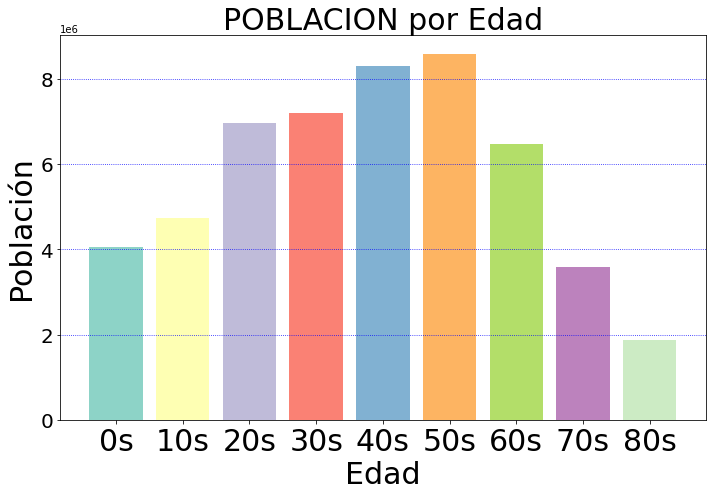

In [ ]:
# GRÁFICOS DE BARRAS - DISTRIBUCIÓN DE LA POBLACIÓN POR EDAD

fig, ax = plt.subplots(figsize=(10, 7))
plt.title('POBLACION por Edad', fontsize=30)
ax.bar(edades_poblacion.edad, edades_poblacion.poblacion, color=color_list)
ax.set_xlabel('Edad', size=30)
plt.xticks(size=30)
plt.xticks(size=30)
plt.yticks(size=20)
ax.set_ylabel('Población', size=30)
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

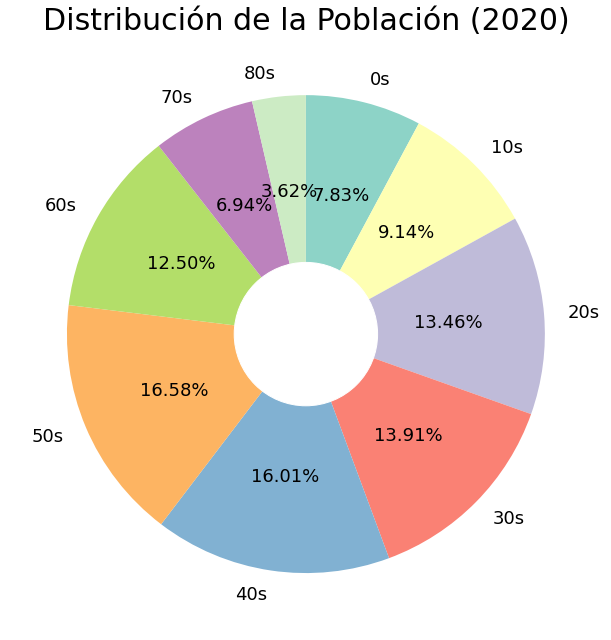

In [ ]:
# GRÁFICO DE SECTORES - DISTRIBUCIÓN DE LA POBLACIÓN POR EDAD

color_pie = [color_list[0], color_list[1], color_list[2]
             , color_list[3], color_list[4], color_list[5]
             , color_list[6], color_list[7], color_list[8]]
fig, ax = plt.subplots(figsize=(9, 9))
plt.title('Distribución de la Población (2020)', fontsize=30)
pop_circle = plt.Circle((0,0), 0.30, color='white')
plt.pie(edades_poblacion.pobla_ratio
        , labels = edades_poblacion.edad
        , autopct = '%.2f%%'
        , colors = color_pie
        , startangle=90
        , counterclock=False
        , textprops={'fontsize': 18})
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

**% DE CONFIRMADOS RESPECTO A LA POBLACIÓN POR EDAD**

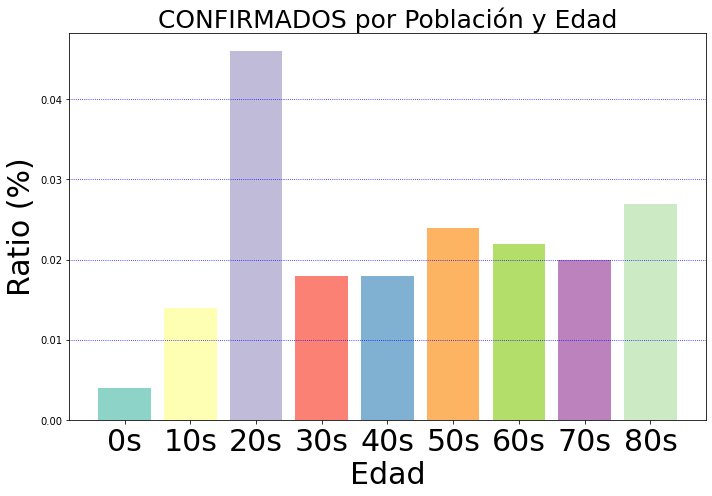

In [ ]:
# GRÁFICO CONFIRMADOS POR POBLACIÓN Y EDAD

fig, ax = plt.subplots(figsize=(10, 7))
plt.title('CONFIRMADOS por Población y Edad', fontsize=25)
ax.bar(edades_poblacion.edad, edades_poblacion.confpob_ratio, color=color_list)
ax.set_xlabel('Edad', size=30)
plt.xticks(size=30)
ax.set_ylabel('Ratio (%)', size=30)
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

**% DE FALLECIDOS RESPECTO A LA POBLACIÓN POR EDAD**

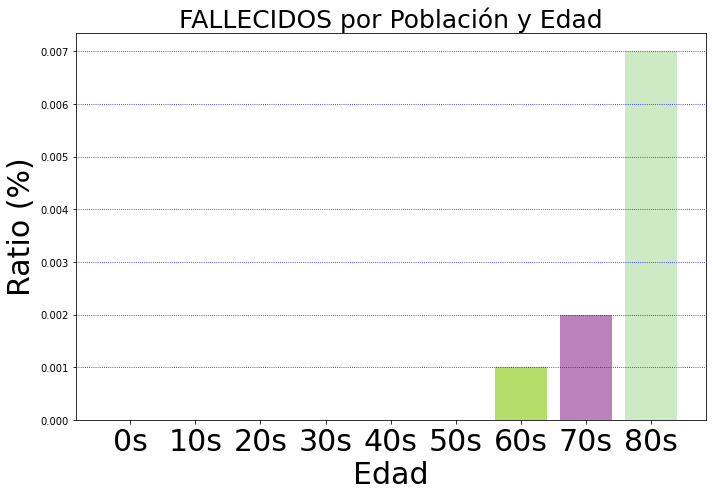

In [ ]:
# GRÁFICO FALLECIDOS POR POBLACIÓN Y EDAD

fig, ax = plt.subplots(figsize=(10, 7))
plt.title('FALLECIDOS por Población y Edad', fontsize=25)
ax.bar(edades_poblacion.edad, edades_poblacion.decpob_ratio, color=color_list)
ax.set_xlabel('Edad', size=30)
plt.xticks(size=30)
ax.set_ylabel('Ratio (%)', size=30)
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

Ahora vamos a comparar los dos gráficos para el caso de **CONFIRMADOS**

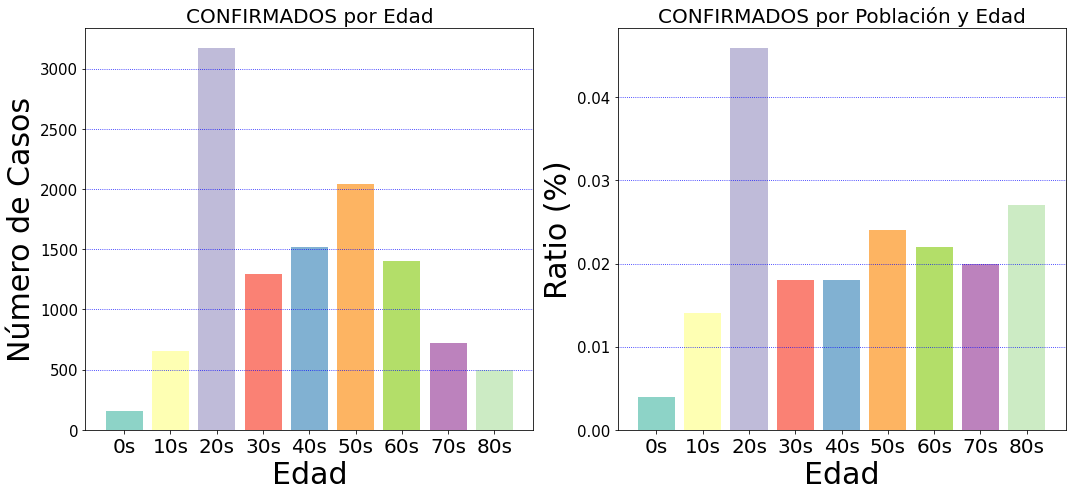

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# GRÁFICO - CONFIRMADOS POR EDAD

axes[0].set_title('CONFIRMADOS por Edad', fontsize=20)
axes[0].bar(edades_poblacion.edad, edades_poblacion.confirmados, color=color_list)
axes[0].set_xlabel('Edad', size=30)
axes[0].tick_params(axis="x", labelsize=20)
axes[0].tick_params(axis="y", labelsize=15) 
axes[0].set_ylabel('Número de Casos', size=30)
axes[0].grid(axis='y',linestyle='dotted', color='b')

# GRÁFICO - CONFIRMADOS POR POBLACION Y EDAD

axes[1].set_title('CONFIRMADOS por Población y Edad', fontsize=20)
axes[1].bar(edades_poblacion.edad, edades_poblacion.confpob_ratio, color=color_list)
axes[1].set_xlabel('Edad', size=30)
axes[1].tick_params(axis="x", labelsize=20)
axes[1].tick_params(axis="y", labelsize=15) 
axes[1].set_ylabel('Ratio (%)', size=30)
axes[1].grid(axis='y',linestyle='dotted', color='b')

Ahora vamos a comparar los dos gráficos para el caso de **FALLECIDOS**

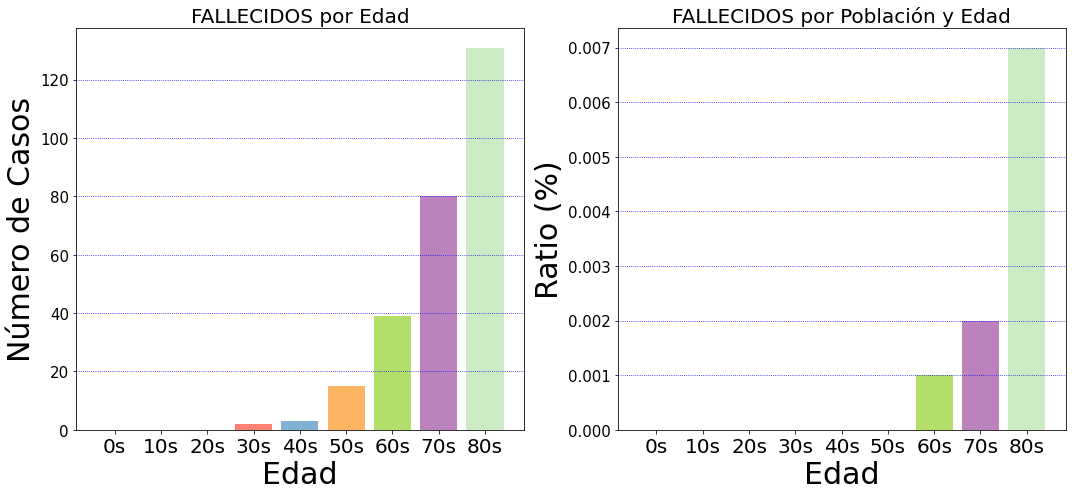

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# GRÁFICO - FALLECIDOS POR EDAD

axes[0].set_title('FALLECIDOS por Edad', fontsize=20)
axes[0].bar(edades_poblacion.edad, edades_poblacion.fallecidos, color=color_list)
axes[0].set_xlabel('Edad', size=30)
axes[0].tick_params(axis="x", labelsize=20)
axes[0].tick_params(axis="y", labelsize=15) 
axes[0].set_ylabel('Número de Casos', size=30)
axes[0].grid(axis='y',linestyle='dotted', color='b')

# GRÁFICO - FALLECIDOS POR POBLACION Y EDAD

axes[1].set_title('FALLECIDOS por Población y Edad', fontsize=20)
axes[1].bar(edades_poblacion.edad, edades_poblacion.decpob_ratio, color=color_list)
axes[1].set_xlabel('Edad', size=30)
axes[1].tick_params(axis="x", labelsize=20)
axes[1].tick_params(axis="y", labelsize=15) 
axes[1].set_ylabel('Ratio (%)', size=30)
axes[1].grid(axis='y',linestyle='dotted', color='b')

Veamos los 4 gráficos juntos

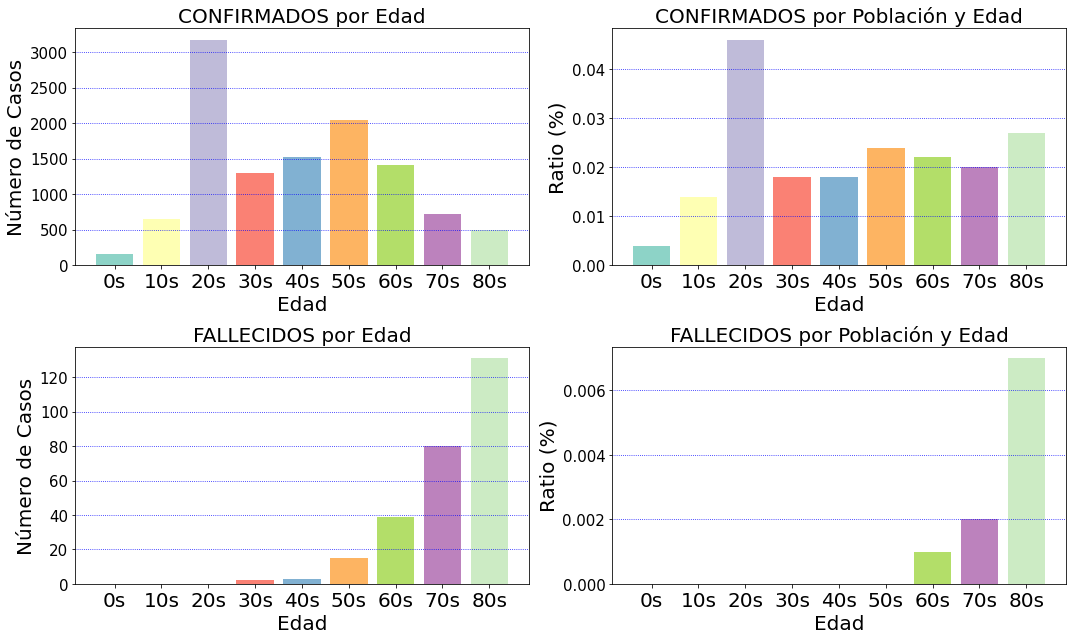

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))

# GRÁFICO - CONFIRMADOS POR EDAD

axes[0,0].set_title('CONFIRMADOS por Edad', fontsize=20)
axes[0,0].bar(edades_poblacion.edad, edades_poblacion.confirmados, color=color_list)
axes[0,0].set_xlabel('Edad', size=20)
axes[0,0].tick_params(axis="x", labelsize=20)
axes[0,0].tick_params(axis="y", labelsize=15) 
axes[0,0].set_ylabel('Número de Casos', size=20)
axes[0,0].grid(axis='y',linestyle='dotted', color='b')

# GRÁFICO - CONFIRMADOS POR POBLACION Y EDAD

axes[0,1].set_title('CONFIRMADOS por Población y Edad', fontsize=20)
axes[0,1].bar(edades_poblacion.edad, edades_poblacion.confpob_ratio, color=color_list)
axes[0,1].set_xlabel('Edad', size=20)
axes[0,1].tick_params(axis="x", labelsize=20)
axes[0,1].tick_params(axis="y", labelsize=15) 
axes[0,1].set_ylabel('Ratio (%)', size=20)
axes[0,1].grid(axis='y',linestyle='dotted', color='b')

# GRÁFICO - FALLECIDOS POR EDAD

axes[1,0].set_title('FALLECIDOS por Edad', fontsize=20)
axes[1,0].bar(edades_poblacion.edad, edades_poblacion.fallecidos, color=color_list)
axes[1,0].set_xlabel('Edad', size=20)
axes[1,0].tick_params(axis="x", labelsize=20)
axes[1,0].tick_params(axis="y", labelsize=15) 
axes[1,0].set_ylabel('Número de Casos', size=20)
axes[1,0].grid(axis='y',linestyle='dotted', color='b')

# GRÁFICO - FALLECIDOS POR POBLACION Y EDAD

axes[1,1].set_title('FALLECIDOS por Población y Edad', fontsize=20)
axes[1,1].bar(edades_poblacion.edad, edades_poblacion.decpob_ratio, color=color_list)
axes[1,1].set_xlabel('Edad', size=20)
axes[1,1].tick_params(axis="x", labelsize=20)
axes[1,1].tick_params(axis="y", labelsize=15) 
axes[1,1].set_ylabel('Ratio (%)', size=20)
axes[1,1].grid(axis='y',linestyle='dotted', color='b')

1. Cuanto más mayor, más propenso a infectarse en general
2. La gran parte de los 50s se reduce porque son el grupo de edad más grande
3. Los 20 son los valores atípicos ya que son medianos pero el grupo más infectado

#### **Casos acumulados por Edad (EVOLUCIÓN DE LA PANDEMIA)**

**CASOS CONFIRMADOS**

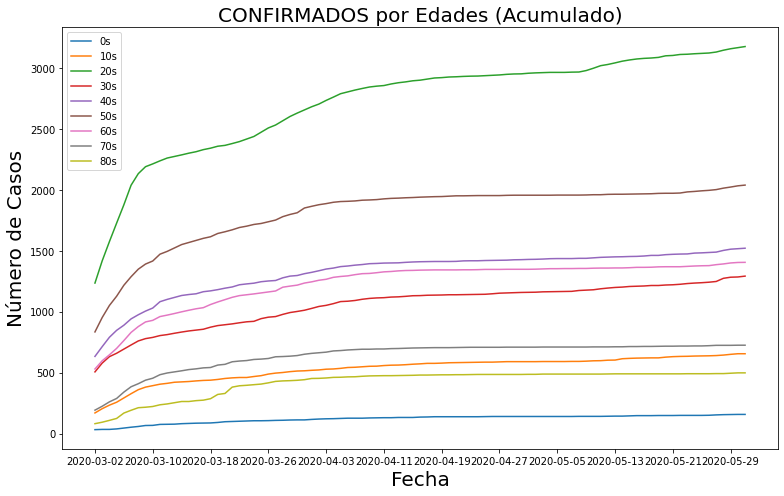

In [ ]:
# GRÁFICO CONFIRMADOS ACUMULADOS POR EDAD EN EL TIEMPO
plot_groupby(edades_temp, 'age', 'confirmed', 'CONFIRMADOS por Edades (Acumulado)')


A simple vista podemos ver que hay dos edades que presentan una zona con una pendiente pronunciada: **20s** y **80s**. Vamos a ver con detalle los datos diarios para esstas dos edades

In [ ]:
# DETALLE PARA EL RANGO 20s
s20 = edades_temp['age'] == '20s'
edad_20s = edades_temp[s20]
display(edad_20s.T)

,2,11,20,29,38,47,56,65,74,83,92,101,110,119,128,137,146,155,164,173,182,191,200,209,218,227,236,245,254,263,272,281,290,299,308,317,326,335,344,353,...,461,470,479,488,497,506,515,524,533,542,551,560,569,578,587,596,605,614,623,632,641,650,659,668,677,686,695,704,713,722,731,740,749,758,767,776,785,794,803,812
date,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,...,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31
time,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
age,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,...,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s,20s
confirmed,1235,1417,1575,1727,1877,2038,2133,2190,2213,2238,2261,2274,2287,2301,2313,2330,2342,2358,2365,2380,2396,2417,2438,2473,2508,2532,2567,2602,2630,2656,2682,2704,2734,2761,2789,2804,2819,2832,2844,2851,...,2931,2933,2934,2937,2940,2943,2948,2951,2952,2957,2960,2962,2964,2964,2964,2966,2967,2979,2998,3019,3029,3042,3056,3066,3074,3079,3082,3087,3100,3103,3111,3113,3117,3120,3123,3131,3146,3158,3167,3176
deceased,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# DETALLE PARA EL RANGO 80s
s80 = edades_temp['age'] == '80s'
edad_80s = edades_temp[s80]
display(edad_80s.T)

,8,17,26,35,44,53,62,71,80,89,98,107,116,125,134,143,152,161,170,179,188,197,206,215,224,233,242,251,260,269,278,287,296,305,314,323,332,341,350,359,...,467,476,485,494,503,512,521,530,539,548,557,566,575,584,593,602,611,620,629,638,647,656,665,674,683,692,701,710,719,728,737,746,755,764,773,782,791,800,809,818
date,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,...,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31
time,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
age,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,...,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s,80s
confirmed,81,93,108,124,168,191,212,216,222,236,243,253,263,263,270,274,286,321,329,381,392,396,401,406,416,428,432,434,437,442,452,453,456,461,462,465,466,470,473,474,...,483,484,485,485,485,485,485,485,485,486,486,488,488,488,488,488,488,488,488,488,489,490,490,490,490,490,490,490,490,490,490,491,491,491,491,492,492,495,498,498
deceased,3,5,6,7,10,12,14,14,15,17,20,21,23,25,25,28,31,31,33,39,41,46,52,55,58,65,70,76,80,82,84,85,86,87,91,92,93,96,100,101,...,113,114,114,114,115,116,116,118,118,118,120,120,120,122,122,122,122,122,122,122,124,125,125,125,127,127,127,127,127,128,128,129,129,129,131,131,131,131,131,131


En este gráfico se puede apreciar los confirmados acumulados en el tiempo, dónde se ve claramente lo siguiente:



1.   Para **20s**, en los primeros días, la pendiente de la curva es muy pronunciada respecto a las demás edades. Aproximadamente hasta el día **2020-03-08**.
2.   Después de eso, la pendiente de todos los grupos se vuelve más suave. Pero a partir del **23-03-2020**, vemos de nuevo, que, para los **20s**, lo casos vuelven aumentar bastante, respecto los demás grupos, que se mantienen con una pendiente suave. Y para los **80s** comienza a ser más pronunciada sobre el **2020-03-18**
3.   Las curvas de más de 60s son casi planas, es decir, el número de confirmados no crece mucho a lo largo del tiempo.

**CASOS FALLECIDOS**

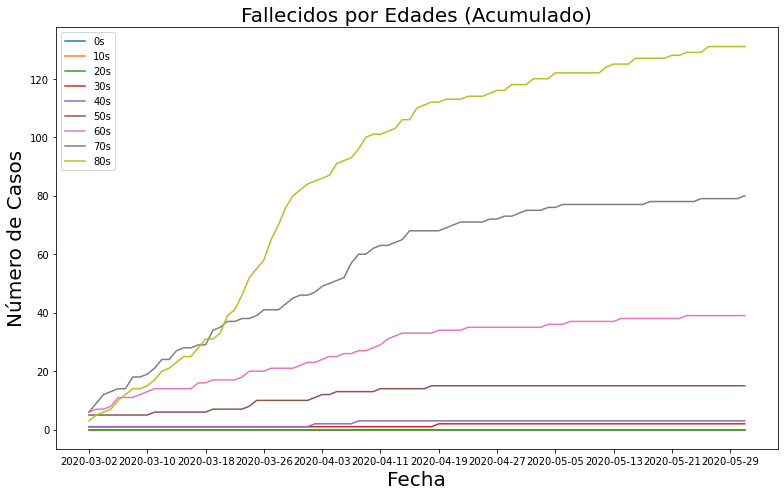

In [ ]:
# GRÁFICO CASOS FALLECIDOS ACUMULADOS POR EDAD EN EL TIEMPO
plot_groupby(edades_temp, 'age', 'deceased', 'Fallecidos por Edades (Acumulado)')

En este gráfico se puede apreciar los casos de fallecidos acumulados en el tiempo, dónde se ve claramente lo siguiente:

1.   Para **70s** y **80s**, las pendientes de las curvas son muy pronunciadas respecto a las demás edades. Es decir, la mayor parte de los fallecimientos se concentran en estas edades. Pero en cambio, los números de confirmados, son los más bajos, lo cual indica, que para estas edades el Índice de Letalidad es muy alto.
2.   Para **20s** tienen 0 casos fallecidos, pero en cambio, los números de confirmados son los más elevados (sobre unas **3000** infecciones).

**CREACIÓN DE DATASET**

Para ver mejor la relación entre **confirmados** y **fallecidos**, vamos a calcular la ratio de fallecidos frente al de confirmados:

**falle_conf_ratio** =  (Total Casos Fallecidos por Edad)/(Total Casos Confirmados por Edad)  *100

In [ ]:
# AÑADIMOS AL DATAFRAME "edades_temp", EL RATIO DE FALLECIDOS FRENTE AL DE CONFIRMADOS
# PARA ELLO, HACEMOS EL SIGUIENTE CÁLCULO
edades_temp['falle_conf_ratio'] = edades_temp.deceased/edades_temp.confirmed * 100.0
display(edades_temp)

,date,time,age,confirmed,deceased,falle_conf_ratio
0,2020-03-02,0,0s,32,0,0.000000
1,2020-03-02,0,10s,169,0,0.000000
2,2020-03-02,0,20s,1235,0,0.000000
3,2020-03-02,0,30s,506,1,0.197628
4,2020-03-02,0,40s,633,1,0.157978
...,...,...,...,...,...,...
814,2020-05-31,0,40s,1521,3,0.197239
815,2020-05-31,0,50s,2039,15,0.735655
816,2020-05-31,0,60s,1405,39,2.775801
817,2020-05-31,0,70s,725,80,11.034483


**RATIO FALLECIDOS vs CONFIRMADOS**

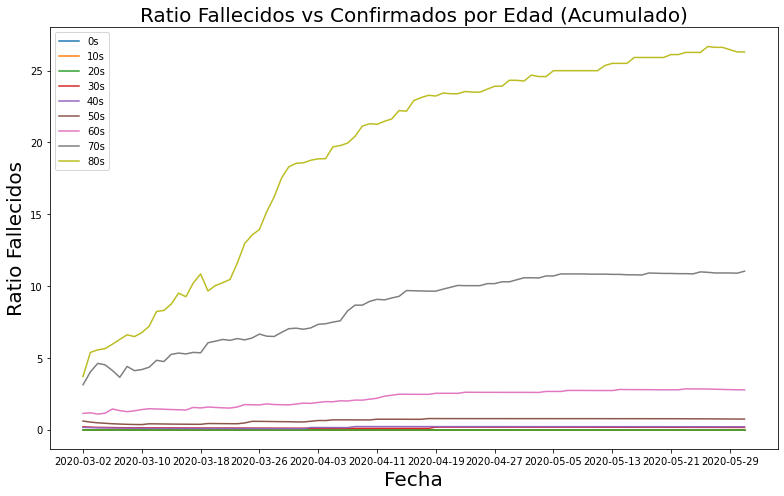

In [ ]:
# GRÁFICO RATIO FALLECIDOS VS CONFIRMADOS
plot_groupby(edades_temp, 'age', 'falle_conf_ratio', 'Ratio Fallecidos vs Confirmados por Edad (Acumulado)', 'Ratio Fallecidos')

En este gráfico se puede apreciar los casos de **Fallecidos** vs **Confirmados** por Edad (acumulados) en el tiempo, dónde se ve claramente lo siguiente:

1. Los **80s** muestran una tasa de fallecimiento más de **2** veces mayor que los **70s**
2. La tasa de fallecidos de los **80s** disminuyó a finales de mayo con más casos confirmados que los fallecidos
3. Los años **70s** tienen una tasa de fallecimiento alrededor de **4** veces superior a la de los **60s** (y mucho más grande que la más joven)
4. Los **80s** y **70s** muestran con diferencia sobre las demás, los ratios más altos de fallEcimientos.

Veamos los 3 Gráficos anteriores en un única vista

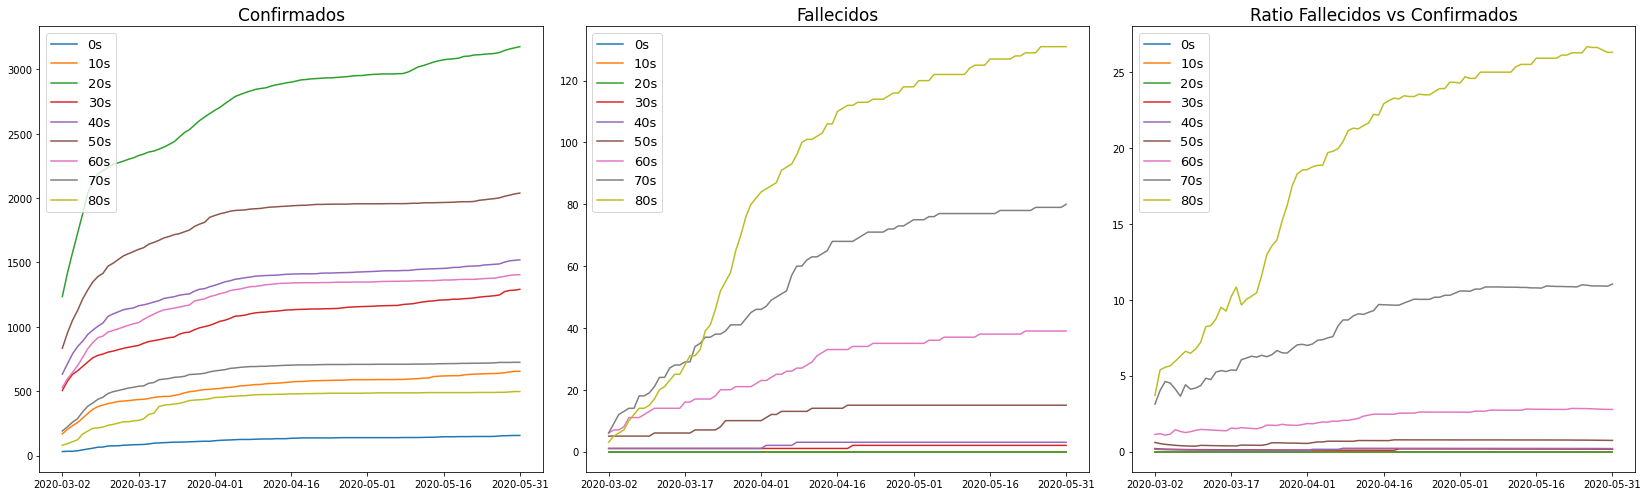

In [ ]:
# VISTA DE LOS 3 GRÁFICOS
#if not fast:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(23, 7))
sub_list = [edades_temp.confirmed, edades_temp.deceased, edades_temp.falle_conf_ratio]
title_list = ['Confirmados', 'Fallecidos', 'Ratio Fallecidos vs Confirmados']
for sub, i, title in zip(sub_list, range(len(sub_list)), title_list):
        confirmed_set = sub.groupby(edades_temp.age)
        for confirmed_each, age_each in zip(confirmed_set, edades_temp.age):
            axes[i].plot(edades_temp.date.unique(), confirmed_each[1], label=age_each)
            axes[i].set_title(title, size=17)
        axes[i].set_xticks(axes[i].get_xticks()[::15])
        axes[i].legend(fontsize=13)

# 2.ANÁLISIS POR PROVINCIAS

En este apartado vamos a analizar los datos epidemiológicos por Provincias/Casos. Disponemos del dataframe **provincias_temp**, con datos de **131** días de los pacientes confirmados y fallecidos, por provincias.

**Rango de Fechas**: 2020-01-20 a 2020-05-31

**Número de Provincias**: 17

En este apartado vamos a analizar los datos epidemiológicos por Provincias/Casos. Disponemos de dos ficheros .csv:

1. **TimeProvince.csv**, con datos de casos confirmados, recuperados y fallecidos por fecha y provincia. Los campos son:

- **date**: Tipo Fecha. Indica la fecha en la que se detectaron los casos
- **time**: Tipo Hora. Indica la Hora en la que ocurrieron los casos
- **province**: Tipo Alfanumérico. Indica la Provincia de la persona infectada
- **confirmed**: Tipo Numérico. Cantidad de casos confirmados (infectados)
- **released**: Tipo Numérico. Cantidad de personas curadas
- **deceased**: Tipo Numérico. Cantidad de fallecidos

2. **Region.csv**, con datos de centros educativos, residencias de ancianos, tasas de envejecimiento de la población, por provincias y ciudades. Los campos son:

- **code**: Tipo Numérico (Clave única). Identificador del registro
- **province**: Tipo Alfanumérico. Indica la Provincia
- **city**: Tipo Alfanumérico. Indica la Ciudad
- **latitude**: Tipo Numérico. Coordenadas de latitud del lugar
- **longitude**: Tipo Numérico. Coordenadas de longitud del lugar
- **elementary_school_count**: Tipo Numérico. Número de Centros de Educación Primaria
- **kindergarten_count**: Tipo Numérico. Número de Jardines de Infancia
- **university_count**: Tipo Numérico. Número de Universidades
- **academy_ratio**: Tipo Numérico. Ratio de Universidades
- **elderly_population_ratio**: Tipo Numérico. Ratio de envejecimiento de la población
- **elderly_alone_ratio**: Tipo Numérico. Ratio de ancianos que viven solos
- **nursing_home_count**: Tipo Numérico. Número de Residencias de ancianos

### PREPARACIÓN DE LOS DATOS

CARGAMOS EL FICHERO **TimeProvince.csv**

In [ ]:
# CARGAMOS LOS DATOS DESDE EL FICHERO TimeProvince.csv
from google.colab import files

uploaded = files.upload()

for TimeProvince in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=TimeProvince, length=len(uploaded[TimeProvince])))

Saving TimeProvince.csv to TimeProvince.csv
User uploaded file "TimeProvince.csv" with length 74585 bytes


In [ ]:
# CREAMOS EL DATAFRAME "provincias_temp"
import pandas as pd
import io
provincias_temp = pd.read_csv(io.StringIO(uploaded[TimeProvince].decode('utf-8')))
provincias_temp

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
2256,2020-05-31,0,Jeollabuk-do,21,19,0
2257,2020-05-31,0,Jeollanam-do,19,17,0
2258,2020-05-31,0,Gyeongsangbuk-do,1379,1295,54
2259,2020-05-31,0,Gyeongsangnam-do,123,121,0


**DATOS BÁSICOS**

In [ ]:
d1 = provincias_temp.min().date
d2 = provincias_temp.max().date
print('PERIODO: desde ', d1, 'al ', d2)
print('Nº DE DÍAS: ', restar_fechas(d1, d2))
print('Nº DE REGISTROS: ', len(provincias_temp.index))
print('Nº DE CAMPOS: ', len(provincias_temp.columns))
print('Nº DE PROVINCIAS: ', len(provincias_temp['province'].unique()))
print('PROVINCIAS: ', provincias_temp.province.unique())
provincias_temp.dtypes

PERIODO: desde  2020-01-20 al  2020-05-31
Nº DE DÍAS:  132
Nº DE REGISTROS:  2261
Nº DE CAMPOS:  6
Nº DE PROVINCIAS:  17
PROVINCIAS:  ['Seoul' 'Busan' 'Daegu' 'Incheon' 'Gwangju' 'Daejeon' 'Ulsan' 'Sejong'
 'Gyeonggi-do' 'Gangwon-do' 'Chungcheongbuk-do' 'Chungcheongnam-do'
 'Jeollabuk-do' 'Jeollanam-do' 'Gyeongsangbuk-do' 'Gyeongsangnam-do'
 'Jeju-do']


date         object
time          int64
province     object
confirmed     int64
released      int64
deceased      int64
dtype: object

Estadísticas Básicas

In [ ]:
provincias_temp.describe().iloc[1:, 1:]

,confirmed,released,deceased
mean,391.320212,255.985847,7.641751
std,1291.888948,993.309392,28.890377
min,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,30.000000,12.000000,0.000000
75%,117.000000,56.000000,1.000000
max,6883.000000,6607.000000,185.000000


CARGAMOS EL FICHERO **Region.csv**

In [ ]:
# CARGAMOS LOS DATOS DESDE EL FICHERO Region.csv
from google.colab import files

uploaded = files.upload()

for Region in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=Region, length=len(uploaded[Region])))

Saving Region.csv to Region.csv
User uploaded file "Region.csv" with length 19082 bytes


In [ ]:
# CREAMOS EL DATAFRAME "region_temp"
import pandas as pd
import io
servicios_temp = pd.read_csv(io.StringIO(uploaded[Region].decode('utf-8')))
servicios_temp

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


**DATOS BÁSICOS**

In [ ]:
print('Nº DE REGISTROS: ', len(servicios_temp.index))
print('Nº DE CAMPOS: ', len(servicios_temp.columns))
print('Nº DE PROVINCIAS: ', len(servicios_temp['province'].unique()))
print('PROVINCIAS: ', servicios_temp.province.unique())
servicios_temp.describe().iloc[1:, 3:]

Nº DE REGISTROS:  244
Nº DE CAMPOS:  12
Nº DE PROVINCIAS:  18
PROVINCIAS:  ['Seoul' 'Busan' 'Daegu' 'Gwangju' 'Incheon' 'Daejeon' 'Ulsan' 'Sejong'
 'Gyeonggi-do' 'Gangwon-do' 'Chungcheongbuk-do' 'Chungcheongnam-do'
 'Jeollabuk-do' 'Jeollanam-do' 'Gyeongsangbuk-do' 'Gyeongsangnam-do'
 'Jeju-do' 'Korea']


,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
mean,74.180328,107.901639,4.151639,1.294754,20.923730,10.644672,1159.258197
std,402.713482,588.788320,22.513041,0.592898,8.087428,5.604886,6384.185085
min,4.000000,4.000000,0.000000,0.190000,7.690000,3.300000,11.000000
25%,14.750000,16.000000,0.000000,0.870000,14.117500,6.100000,111.000000
50%,22.000000,31.000000,1.000000,1.270000,18.530000,8.750000,300.000000
75%,36.250000,55.250000,3.000000,1.612500,27.262500,14.625000,694.500000
max,6087.000000,8837.000000,340.000000,4.180000,40.260000,24.700000,94865.000000


Vamos a crear wel dataframe **provincias** con datos de los ficheros **TimeProvince** (dataframe provincias_temp) y **Region** (dataframe servicios_temp). Crearemos los siguientes campos calculados calculados:

- **conf_ratio_prov** = (Total Casos Confirmados por Provincia /Total Casos Confirmados)*100
- **dec_ratio_prov** = (otal Casos Fallecidos por Provincia/Total Casos Fallecidos)*100
- **rele_ratio_prov** = (otal Casos Recuperados por Provincia/Total Casos Recuperados)*100

Del dataframe servicios_temp sólo nos interesan los campos: **province** y **elderly_population_ratio** (envejecimiento).

In [ ]:
# CREAMOS UN DATAFRAME CON CAMPOS CALCULADOS, Y CAMPOS DE TIMEPROVINCE Y REGION

pd.set_option('mode.chained_assignment', None)
provincias = provincias_temp[provincias_temp.date==provincias_temp.date.iloc[-1]]
# BORRAMOS LOS CAMPOS date Y time POR NO SER NECESARIOS
del provincias['date']
del provincias['time']
# CÁLCULO RATIO CONFIRMADOS POR PROVINCIAS
provincias['conf_ratio_prov'] = round(provincias.confirmed / sum(provincias.confirmed) * 100, 2)
# CÁLCULO DE RATIO DE FALLECIDOS POR PROVINCIAS
provincias['dec_ratio_prov'] = round(provincias.deceased / sum(provincias.deceased) * 100, 2)
# CÁLCULO DE RATIO DE RECUPERADOS POR PROVINCIAS
provincias['rele_ratio_prov'] = round(provincias.released / sum(provincias.released) * 100, 2)
# 1. AGRUPAMOS POR PROVINCIAS Y OBTENEMOS EL PROMEDIO DEL CAMPO ENVEJECIMIENTO
servicios_agrupado = pd.DataFrame(servicios_temp.groupby('province').mean().elderly_population_ratio.sort_values(ascending=False))
# 2. AGRUPAMOS POR PROVINCIAS Y OBTENEMOS LOS TOTALES DE LOS CENTROS SOCIALES
#servicios_agrupado ['elementary_school'] = pd.DataFrame(servicios_temp.groupby('province').sum().elementary_school_count)
#servicios_agrupado ['kindergarten'] = pd.DataFrame(servicios_temp.groupby('province').sum().kindergarten_count)
#servicios_agrupado ['university'] = pd.DataFrame(servicios_temp.groupby('province').sum().university_count)
#servicios_agrupado ['nursing_home'] = pd.DataFrame(servicios_temp.groupby('province').sum().nursing_home_count)
# 3. UNIMOS LOS DATAFRAME: PROVINCIAS Y SERVICIOS AGRUPADO POR EL CAMPO COMÚN: province
df_merge = pd.merge(servicios_agrupado, provincias, on='province')
# 4. RENOMBRAMOS COLUMNAS
df_merge = df_merge.rename(columns={'elderly_population_ratio':'envejeci_ratio'})
# 5. NOS QUEDAMOS CON LAS COLUMNAS NECESARIAS
provincias = df_merge [['province','confirmed','released','deceased','conf_ratio_prov','dec_ratio_prov','rele_ratio_prov',
                        'envejeci_ratio']]
# 6. REDONDEAMOS A 2 DECIMALES EL CAMPO envejeci_ratio
provincias = provincias.round({"envejeci_ratio":2}) 
provincias = provincias.sort_values('confirmed', ascending=False)
#provincias.set_index(np.arange(1, len(provincias)+1), inplace=True)
provincias

,province,confirmed,released,deceased,conf_ratio_prov,dec_ratio_prov,rele_ratio_prov,envejeci_ratio
8,Daegu,6883,6607,185,62.95,68.52,66.16,17.03
1,Gyeongsangbuk-do,1379,1295,54,12.61,20.00,12.97,27.56
10,Seoul,861,627,4,7.87,1.48,6.28,15.74
13,Gyeonggi-do,840,650,19,7.68,7.04,6.51,14.43
9,Incheon,206,94,0,1.88,0.00,0.94,16.40
7,Busan,147,138,3,1.34,1.11,1.38,19.36
4,Chungcheongnam-do,146,142,0,1.34,0.00,1.42,23.84
3,Gyeongsangnam-do,123,121,0,1.12,0.00,1.21,24.75
5,Chungcheongbuk-do,60,49,0,0.55,0.00,0.49,23.19
6,Gangwon-do,57,50,3,0.52,1.11,0.50,22.89


Vamos a ampliar el dataframe **provincias**, añadiendo los campos de lugares de contagios del datframe **servicios_temp**: **elementary_school**, **kindergarten**, **university** y **nursing_home**. Le daremos el nombre de **provincias_bis**

In [ ]:
# CREAMOS UN DATAFRAME CON CAMPOS CALCULADOS, Y CAMPOS DE TIMEPROVINCE Y REGION

pd.set_option('mode.chained_assignment', None)
provincias_bis = provincias_temp[provincias_temp.date==provincias_temp.date.iloc[-1]]
# BORRAMOS LOS CAMPOS date Y time POR NO SER NECESARIOS
del provincias_bis['date']
del provincias_bis['time']
# CÁLCULO RATIO CONFIRMADOS POR PROVINCIAS
provincias_bis['conf_ratio_prov'] = round(provincias_bis.confirmed / sum(provincias_bis.confirmed) * 100, 2)
# CÁLCULO DE RATIO DE FALLECIDOS POR PROVINCIAS
provincias_bis['dec_ratio_prov'] = round(provincias_bis.deceased / sum(provincias_bis.deceased) * 100, 2)
# CÁLCULO DE RATIO DE RECUPERADOS POR PROVINCIAS
provincias_bis['rele_ratio_prov'] = round(provincias_bis.released / sum(provincias_bis.released) * 100, 2)
# 1. AGRUPAMOS POR PROVINCIAS Y OBTENEMOS EL PROMEDIO DEL CAMPO ENVEJECIMIENTO
servicios_agrupado = pd.DataFrame(servicios_temp.groupby('province').mean().elderly_population_ratio.sort_values(ascending=False))
# 2. AGRUPAMOS POR PROVINCIAS Y OBTENEMOS LOS TOTALES DE LOS CENTROS SOCIALES
servicios_agrupado ['elementary_school'] = pd.DataFrame(servicios_temp.groupby('province').sum().elementary_school_count)
servicios_agrupado ['kindergarten'] = pd.DataFrame(servicios_temp.groupby('province').sum().kindergarten_count)
servicios_agrupado ['university'] = pd.DataFrame(servicios_temp.groupby('province').sum().university_count)
servicios_agrupado ['nursing_home'] = pd.DataFrame(servicios_temp.groupby('province').sum().nursing_home_count)
# 3. UNIMOS LOS DATAFRAME: PROVINCIAS Y SERVICIOS AGRUPADO POR EL CAMPO COMÚN: province
df_merge = pd.merge(servicios_agrupado, provincias_bis, on='province')
# 4. RENOMBRAMOS COLUMNAS
df_merge = df_merge.rename(columns={'elderly_population_ratio':'envejeci_ratio'})
# 5. NOS QUEDAMOS CON LAS COLUMNAS NECESARIAS
provincias_bis = df_merge [['province','confirmed','released','deceased','conf_ratio_prov','dec_ratio_prov','rele_ratio_prov',
                        'envejeci_ratio','elementary_school','kindergarten','university','nursing_home']]
# 6. REDONDEAMOS A 2 DECIMALES EL CAMPO envejeci_ratio
provincias_bis = provincias_bis.round({"envejeci_ratio":2}) 
provincias_bis = provincias_bis.sort_values('confirmed', ascending=False)
#provincias.set_index(np.arange(1, len(provincias)+1), inplace=True)
provincias_bis

,province,confirmed,released,deceased,conf_ratio_prov,dec_ratio_prov,rele_ratio_prov,envejeci_ratio,elementary_school,kindergarten,university,nursing_home
8,Daegu,6883,6607,185,62.95,68.52,66.16,17.03,458,710,22,10166
1,Gyeongsangbuk-do,1379,1295,54,12.61,20.00,12.97,27.56,942,1414,66,8948
10,Seoul,861,627,4,7.87,1.48,6.28,15.74,1214,1660,96,45478
13,Gyeonggi-do,840,650,19,7.68,7.04,6.51,14.43,2554,4474,122,40982
9,Incheon,206,94,0,1.88,0.00,0.94,16.40,500,806,14,8994
7,Busan,147,138,3,1.34,1.11,1.38,19.36,608,816,44,13504
4,Chungcheongnam-do,146,142,0,1.34,0.00,1.42,23.84,818,998,42,7282
3,Gyeongsangnam-do,123,121,0,1.12,0.00,1.21,24.75,1002,1372,42,10728
5,Chungcheongbuk-do,60,49,0,0.55,0.00,0.49,23.19,518,656,34,5538
6,Gangwon-do,57,50,3,0.52,1.11,0.50,22.89,698,736,36,5038


### ANALÍTICA DESCRIPTIVA

### 2.1 ANÁLISIS CASOS

#### **Casos Confirmados por Provincias**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


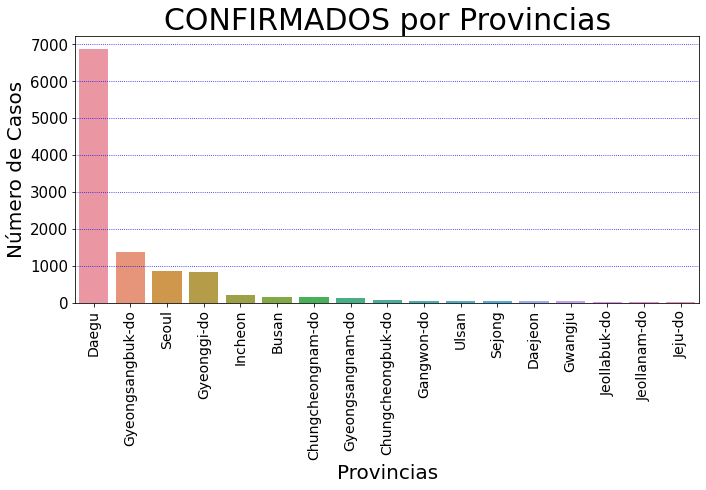

In [ ]:
# GRÁFICO - CONFIRMADOS
fig, ax = plt.subplots(figsize=(10, 7))
plt.title(f'CONFIRMADOS por Provincias', fontsize=30)
sns.barplot(provincias.province, provincias.confirmed)
plt.xticks(rotation=90)
ax.set_xlabel('Provincias', size=20)
plt.xticks(size=14)
plt.yticks(size=15)
ax.set_ylabel('Número de Casos', size=20)
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

#### **Casos Fallecidos por Provincias**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


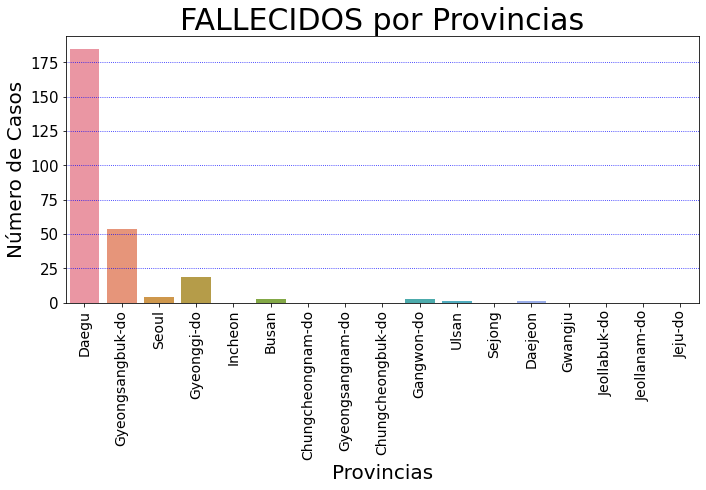

In [ ]:
# GRÁFICO - FALLECIDOS
fig, ax = plt.subplots(figsize=(10, 7))
plt.title(f'FALLECIDOS por Provincias', fontsize=30)
sns.barplot(provincias.province, provincias.deceased)
plt.xticks(rotation=90)
ax.set_xlabel('Provincias', size=20)
plt.xticks(size=14)
plt.yticks(size=15)
ax.set_ylabel('Número de Casos', size=20)
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

#### **Casos Recuperados por Provincias**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


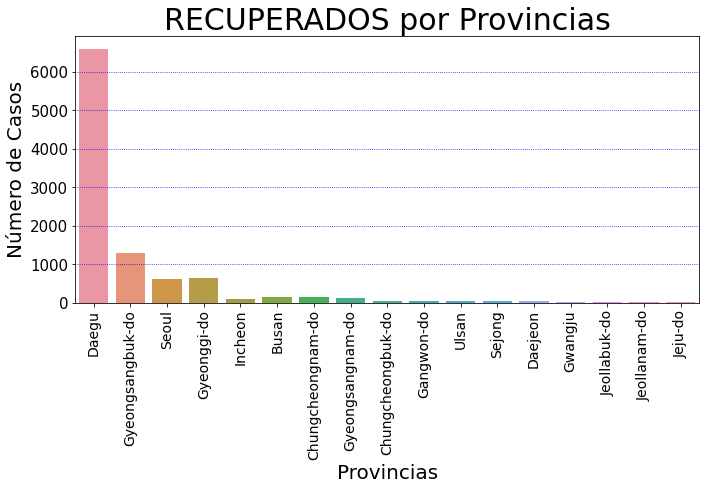

In [ ]:
# GRÁFICO - RECUPERADOS
fig, ax = plt.subplots(figsize=(10, 7))
plt.title(f'RECUPERADOS por Provincias', fontsize=30)
sns.barplot(provincias.province, provincias.released)
plt.xticks(rotation=90)
ax.set_xlabel('Provincias', size=20)
plt.xticks(size=14)
plt.yticks(size=15)
ax.set_ylabel('Número de Casos', size=20)
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

En estos gráficos se puede apreciar que hay 4 ciudades que acumulan la mayoría de los casos, y especialmente una, **Daegu**. 

#### **Las 5 provincias con mayor Nº de Casos**

Vamos a representar las 5 provincias con mayor número de casos. Para ello creamos un nuevo dataframe llamado **provincias5**

In [ ]:
# DATAFRAME CON LAS 5 PROVINCIAS CON MAYOR Nº DE CASOS CONFIRMADOS
provincias5 = provincias.copy()
provincias5.loc['18',:] = provincias5.iloc[6:, :].sum()
provincias5.loc['18','province'] = 'Otros'
provincias5 = provincias5[provincias5.conf_ratio_prov > provincias5.iloc[5, 4]]
provincias5

,province,confirmed,released,deceased,conf_ratio_prov,dec_ratio_prov,rele_ratio_prov,envejeci_ratio
8,Daegu,6883.0,6607.0,185.0,62.95,68.52,66.16,17.03
1,Gyeongsangbuk-do,1379.0,1295.0,54.0,12.61,20.00,12.97,27.56
10,Seoul,861.0,627.0,4.0,7.87,1.48,6.28,15.74
13,Gyeonggi-do,840.0,650.0,19.0,7.68,7.04,6.51,14.43
9,Incheon,206.0,94.0,0.0,1.88,0.00,0.94,16.40
18,Otros,618.0,575.0,5.0,5.65,1.85,5.75,215.83


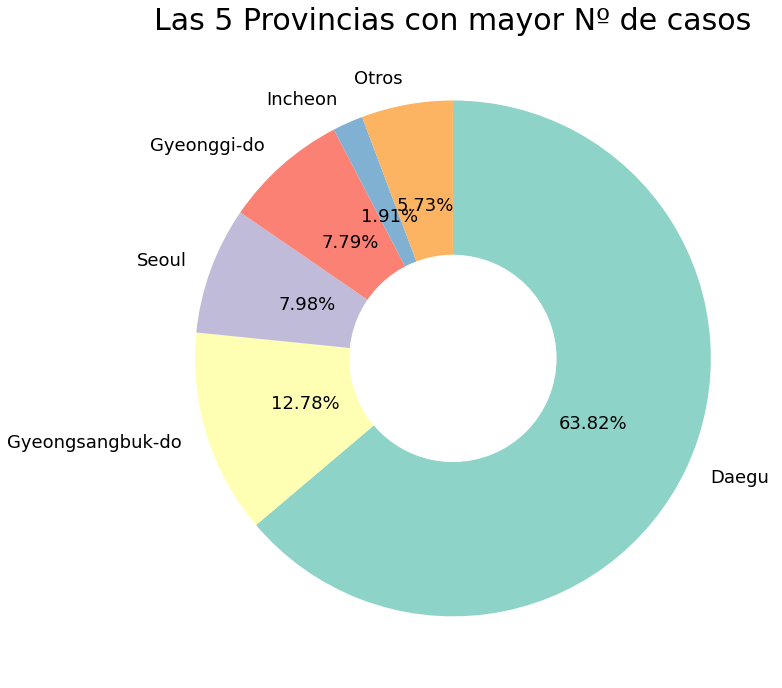

In [ ]:
# GRÁFICO CON LAS 5 PROVINCIAS Y OTROS

color_pie = [color_list[0], color_list[1], color_list[2]
             , color_list[3], color_list[4], color_list[5]
             , color_list[6], color_list[7], color_list[8]]
fig, ax = plt.subplots(figsize=(11, 11))
plt.title('Las 5 Provincias con mayor Nº de casos', fontsize=30)
pop_circle = plt.Circle((0,0), 0.40, color='white')
plt.pie(provincias5.conf_ratio_prov
        , labels = provincias5.province
        , autopct = '%.2f%%'
        , colors = color_pie
        , startangle=90
        , counterclock=False
        , textprops={'fontsize': 18})
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

Del análisis de estos gráficos, podemos obtener las siguientes conclusiones:

1.   Alrededor del **75%** de todos los casos confirmados, están concentrados en dos ciudades: **Daegu** y **Gyeongsangbuk-do**.
2.   En **Daegu**, hubo grandes eventos religiosos antes de las infecciones masivas, lo que indica que esta fue la causa. Adjuntamos la noticia sobre esto:
https://www.efe.com/efe/espana/sociedad/daegu-una-ciudad-golpeada-por-el-coronavirus-de-la-noche-a-manana/10004-4178571#
3. El área metropolitana de la capital tiene la mayoría de los casos: **Seúl**, **Gyunggi-do** e **Incheon**.


#### **Casos Confirmados por Provincia (SIN 2 outliers)**

Según la noticia el gran número de casos confirmados en **Daegu** fué debido a un evento religioso multitudinario, lo mismo aunque en menor escala para **Gyeongsangbuk-do**. Por lo tanto, si consideramos a estas 2 provincias como oautliers, veamos el gráfico sin estas 2 ciudades.

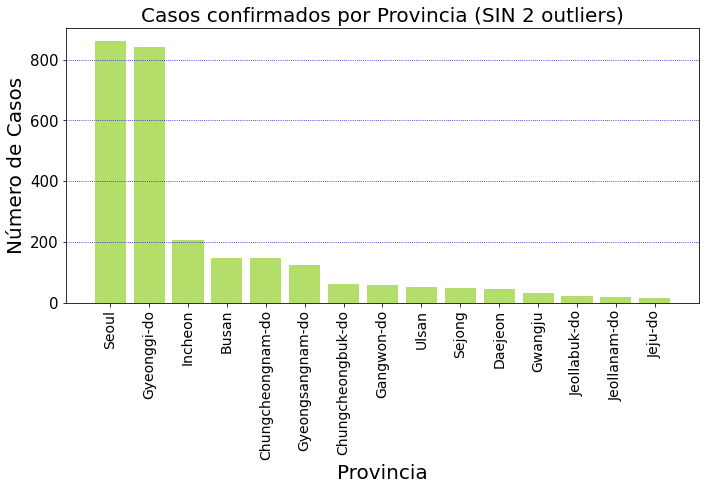

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.title('Casos confirmados por Provincia (SIN 2 outliers)', fontsize=20)
plt.xticks(rotation=90)
plt.xticks(size=14)
plt.yticks(size=15)
plt.bar(provincias[2:].province
        , provincias[2:].confirmed
        , color=color_list[6])
plt.xlabel('Provincia',size=20)
plt.ylabel('Número de Casos',size=20)
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

###2.2 ANÁLISIS ENVEJECIMIENTO Y POBLACIÓN

#### **Proporción de la población de ancianos (orden por Provincia, de mayor a menor)**
Vamos a representar la población envejecidad por provincia

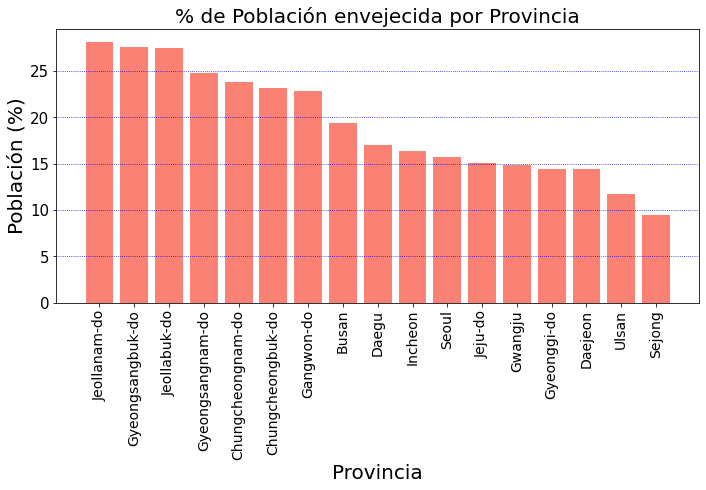

In [ ]:
# GRÁFICO POBLACION DE ANCIANOS POR PROVINCIA DE MAYOR A MENOR
envejecimiento = provincias.sort_values('envejeci_ratio', ascending=False)
fig, ax = plt.subplots(figsize=(10, 7))
plt.title('% de Población envejecida por Provincia', fontsize=20)
plt.xticks(rotation=90)
plt.bar(envejecimiento.province, envejecimiento.envejeci_ratio, color=color_list[3])
plt.xticks(size=14)
plt.yticks(size=15)
plt.xlabel('Provincia', size=20)
plt.ylabel('Población (%)',size=20)
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

#### **Proporción de la población de ancianos (orden por casos confirmados, de mayor a menor)**

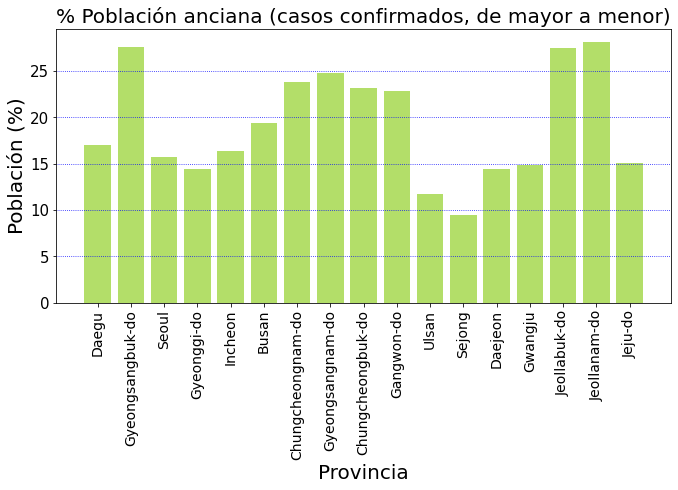

In [ ]:
# GRÁFICO POBLACION DE ANCIANOS POR CASOS CONFIRMADOS DE MAYOR A MENOR
fig, ax = plt.subplots(figsize=(10, 7))
plt.title('% Población anciana (casos confirmados, de mayor a menor)', fontsize=20)
plt.xticks(rotation=90)
plt.bar(provincias.province, provincias.envejeci_ratio, color=color_list[6])
plt.xticks(size=14)
plt.yticks(size=15)
plt.xlabel('Provincia', size=20)
plt.ylabel('Población (%)',size=20)
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

Hacer cálculos de correlación: envejecimiento y confirmados por provincia
1. No hay correlación entre la proporción de la población de edad avanzada y el número de casos confirmados
2. **Gyeongsangbuk-do** está justo al lado de **Daegu** geográficamente, por lo tanto, su alta tasa de infección parece provenir mas de la ubicación, que de su tasa de envejecimiento, ya que como hemos visto anteriormente, **Daegu** ha sido una de las provincias con mayor número de contagios.
3. Sin tener en cuenta los valores atípicos (**Daegu**, **Gyeongsangbuk-do**). Las siguientes dos provincias más infectadas, han sido **Gyeonggi-do** y **Seúl**, que a su vez, son las regiones más pobladas, es decir, que también ha afectado la densidad de población.

###2.2 ANÁLISIS ACUMULADOS POR FECHAS

#### **Total Casos confirmados por fecha (ACUMULADOS)**

In [ ]:
# DETALLE CASOS CONFIRMADOS POR DÍAS
conf_fecha = pd.DataFrame()
conf_fecha['total'] = provincias_temp.groupby('date').sum().confirmed
conf_fecha = conf_fecha.sort_values('date', ascending=True)
display(conf_fecha.T)

date,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,...,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31
total,1,1,1,1,2,2,3,4,4,4,7,11,12,15,15,16,18,23,24,24,27,27,29,29,29,29,29,29,29,30,52,104,204,433,602,833,977,1261,1766,2337,...,10271,10277,10282,10288,10297,10302,10313,10319,10319,10324,10327,10335,10339,10340,10340,10343,10352,10370,10398,10430,10456,10481,10510,10536,10547,10556,10564,10577,10607,10618,10631,10651,10672,10687,10704,10743,10815,10873,10907,10934


En este dataframe podemos ver que a partir del **2020-02-21**, el número de casos empieza a crecer exponcialmente. Esto se puede apreciar en un gráfico de acumulados

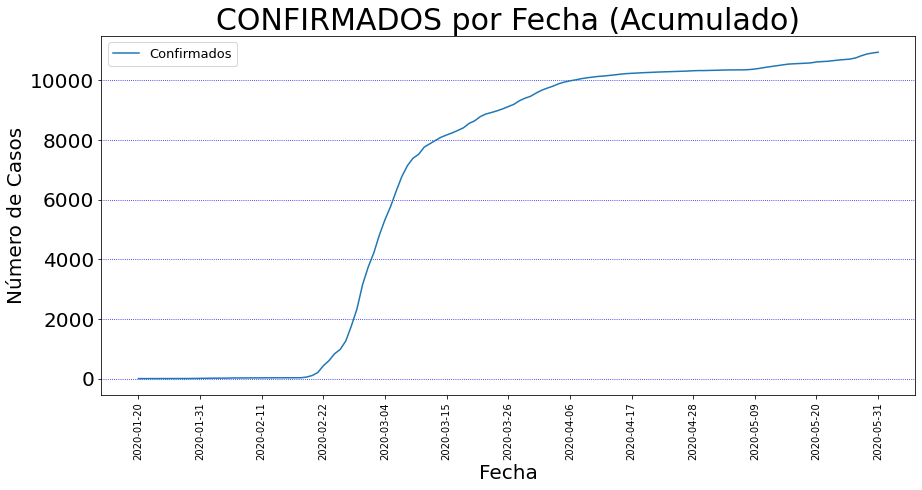

In [ ]:
# TOTAL CASOS CONFIRMADOS POR FECHA (ACUMULADO)	
total_list = provincias_temp.groupby('date').sum().confirmed

fig, ax = plt.subplots(figsize=(13, 7))
plt.title('CONFIRMADOS por Fecha (Acumulado)', fontsize=30)
ax.set_xlabel('Fecha', size=20)
ax.set_ylabel('Número de Casos', size=20)
plt.plot(provincias_temp.date.unique()
         , provincias_temp.groupby('date').sum().confirmed)
ax.set_xticks(ax.get_xticks()[::11])
plt.xticks(size=10)
plt.yticks(size=20)
plt.xticks(rotation=90)
plt.legend(['Confirmados'])
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

Podemos ver tres fases bien diferenciadas: 

1.	**Fase Inicial**: desde el primer caso en 2020-01-20 hasta el 2020-02-20, el número de casos confirmados estaba en torno a 100, en concreto 104. 
2.	**Fase Explosión**: A partir de entonces, se produjo un fuerte crecimiento exponencial durante unas 3 semanas, llegando a unos 8000 casos el 14-03-2020. 
3.	**Fase Estabilización**: La curva se aplana hasta 2020-05-08, y luego comienza a subir nuevamente. 


**FASE INICIAL**

In [ ]:
total_list_conf = provincias_temp.groupby('date').sum().confirmed
pd.DataFrame(total_list_conf[total_list_conf<=104].tail(10)).T

date,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20
confirmed,29,29,29,29,29,29,29,30,52,104


**FASE DE EXPLOSIÓN**

In [ ]:
pd.DataFrame(total_list_conf[total_list_conf>=6000].head(10)).T

date,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15
confirmed,6284,6767,7134,7382,7513,7755,7869,7979,8086,8162


Podemos ver tres fases bien diferenciadas:

1. **Fase Inicial**: desde el primer caso en **2020-01-20** hasta el **2020-02-20**, el número de casos confirmados estaba entorno a 104.
2. **Fase Explosión**: A partir de entonces, se produjo un fuerte crecimiento exponncial durante unas 3 semanas, llegando a unos 8000 casos el **14-03-2020**.
3. **Fase Estabilización**: La curva se aplana hasta **2020-05-08**, y luego comienza a subir nuevamente.

#### **Total Casos fallecidos por Fecha (Acumulados)**

En este dataframe podemos ver que a partir del **2020-02-25**, el número de casos empieza a crecer exponcialmente. Esto se puede apreciar en un gráfico de acumulados

In [ ]:
# DETALLE CASOS CONFIRMADOS POR DÍAS
conf_fecha = pd.DataFrame()
conf_fecha['total'] = provincias_temp.groupby('date').sum().deceased
conf_fecha = conf_fecha.sort_values('date', ascending=True)
display(conf_fecha.T)

date,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,...,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31
total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,4,8,12,13,13,13,...,238,240,240,240,242,243,244,246,247,248,250,250,252,254,255,256,256,256,256,256,258,259,260,260,262,262,263,263,263,264,264,266,266,267,269,269,269,269,269,270


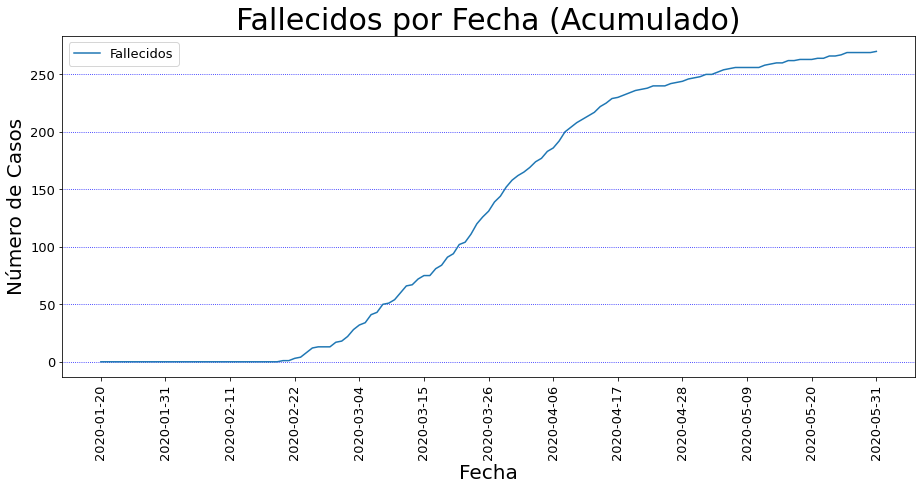

In [ ]:
# # TOTAL CASOS FALLECIDOS POR FECHA (ACUMULADO)
total_list = provincias_temp.groupby('date').sum().deceased

fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Fallecidos por Fecha (Acumulado)', fontsize=30)
ax.set_xlabel('Fecha', size=20)
ax.set_ylabel('Número de Casos', size=20)
plt.plot(provincias_temp.date.unique()
         , provincias_temp.groupby('date').sum().deceased)
ax.set_xticks(ax.get_xticks()[::11])
plt.xticks(rotation=90)
plt.legend(['Fallecidos'])
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

Veamos la comparativa Confirmados vs Fallecidos

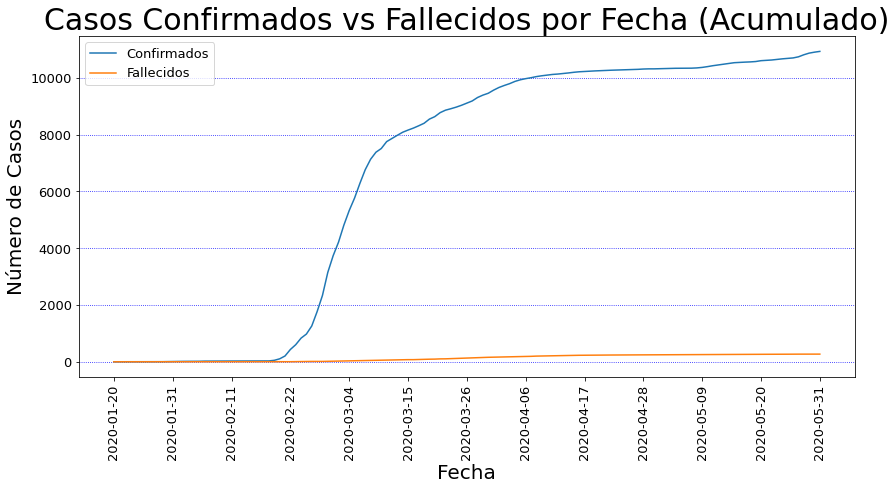

In [ ]:
# TOTAL CONFIRMADOS VS FALLECIDOS

fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Casos Confirmados vs Fallecidos por Fecha (Acumulado)', fontsize=30)
ax.set_xlabel('Fecha', size=20)
ax.set_ylabel('Número de Casos', size=20)
plt.plot(provincias_temp.date.unique()
         , provincias_temp.groupby('date').sum().confirmed)
plt.plot(provincias_temp.date.unique()
         , provincias_temp.groupby('date').sum().deceased)
ax.set_xticks(ax.get_xticks()[::11])
plt.xticks(rotation=90)
plt.legend(['Confirmados', 'Fallecidos'])
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

#### **Total Casos confirmados por Fecha (Acumulados) - POR CIUDADES (17)**

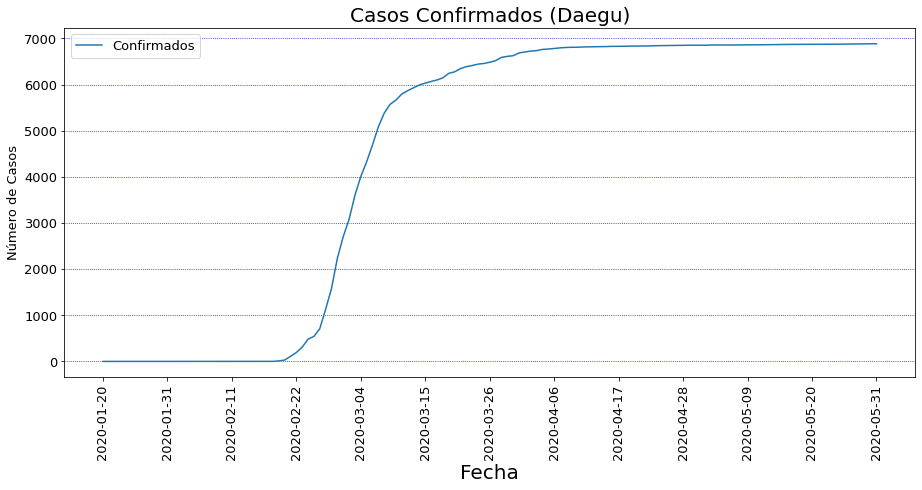

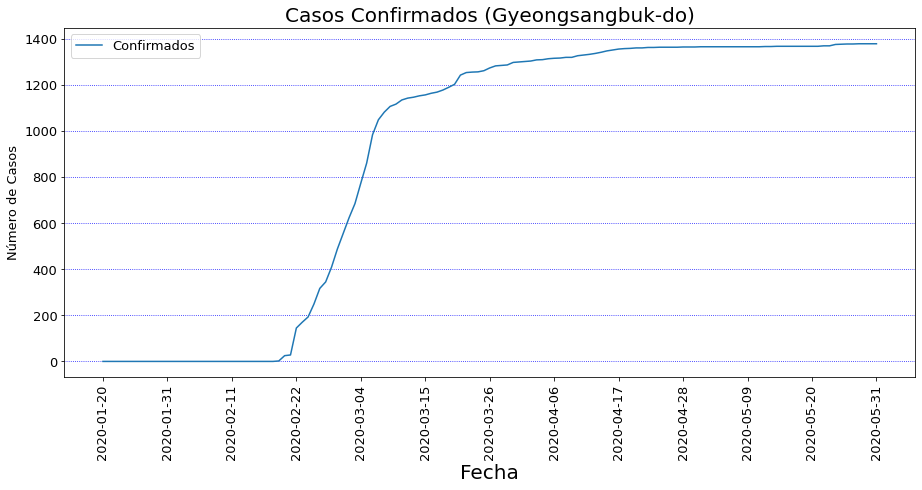

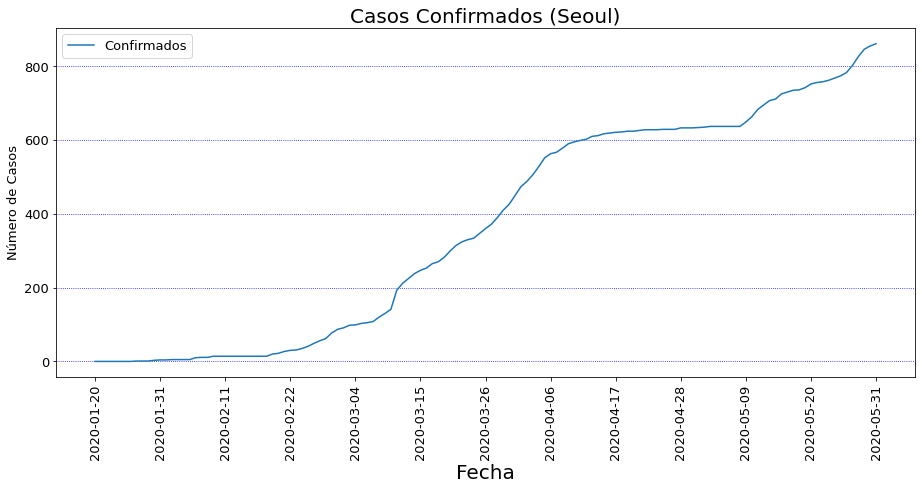

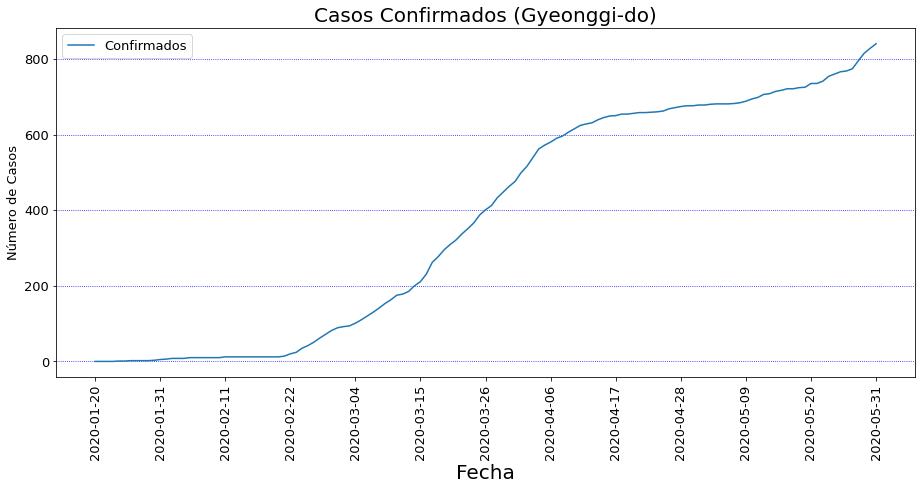

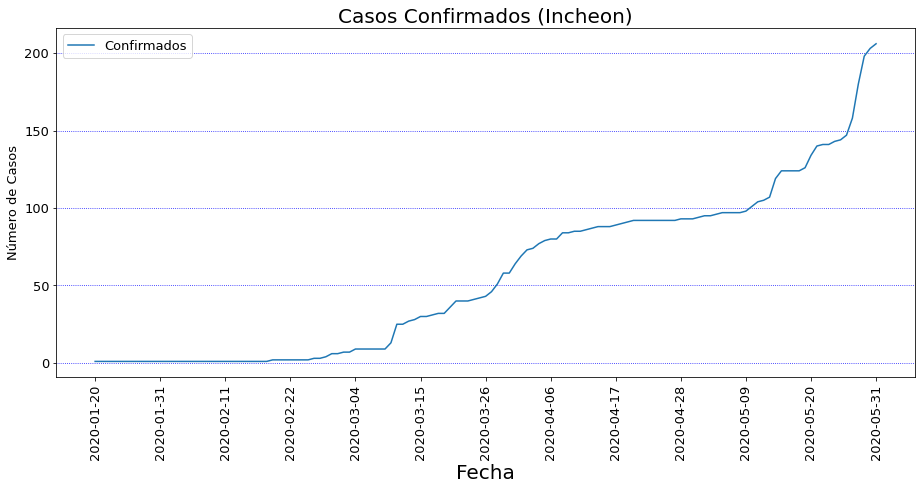

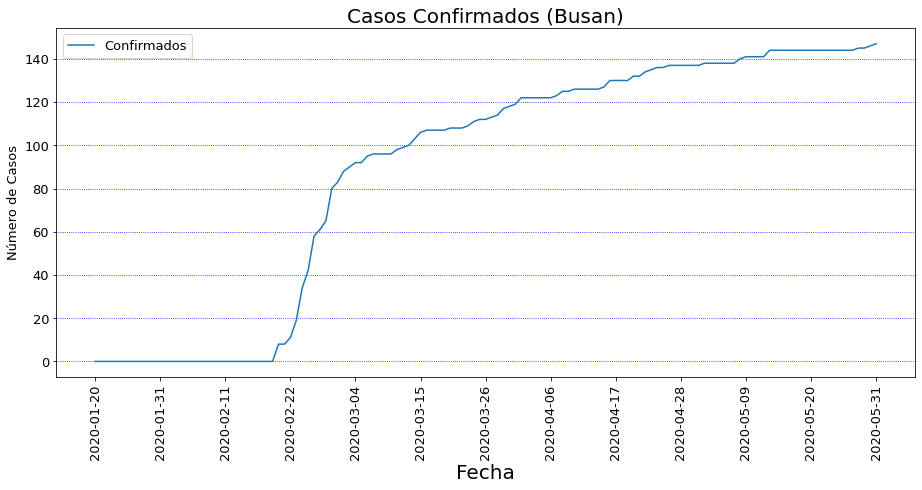

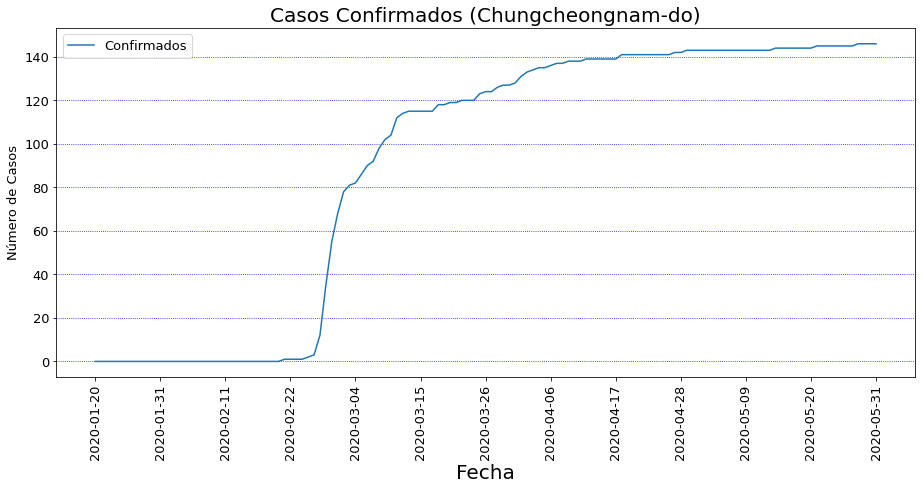

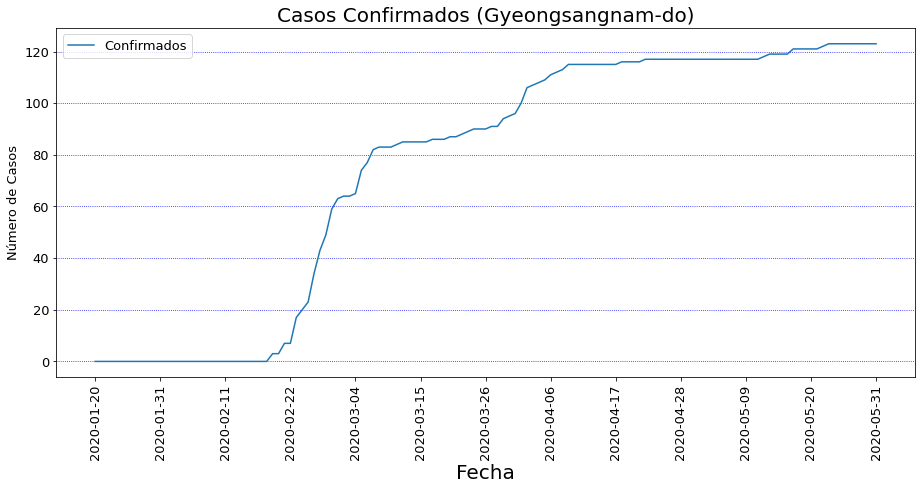

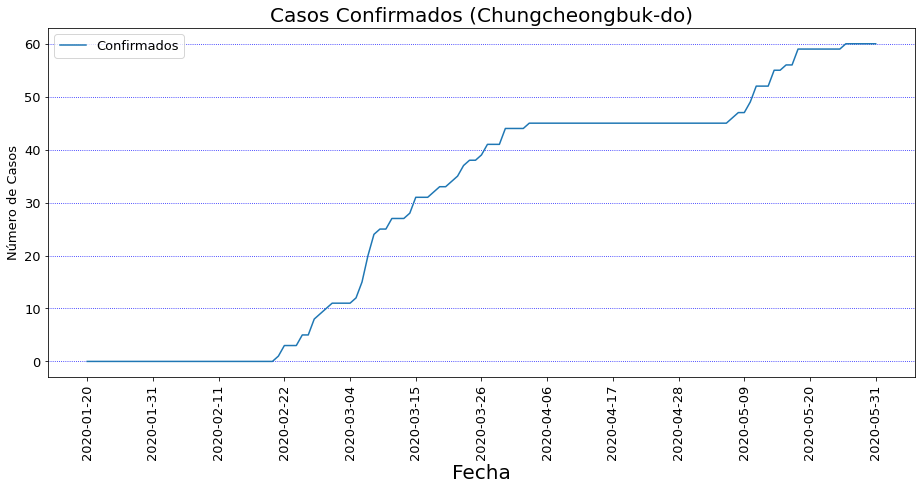

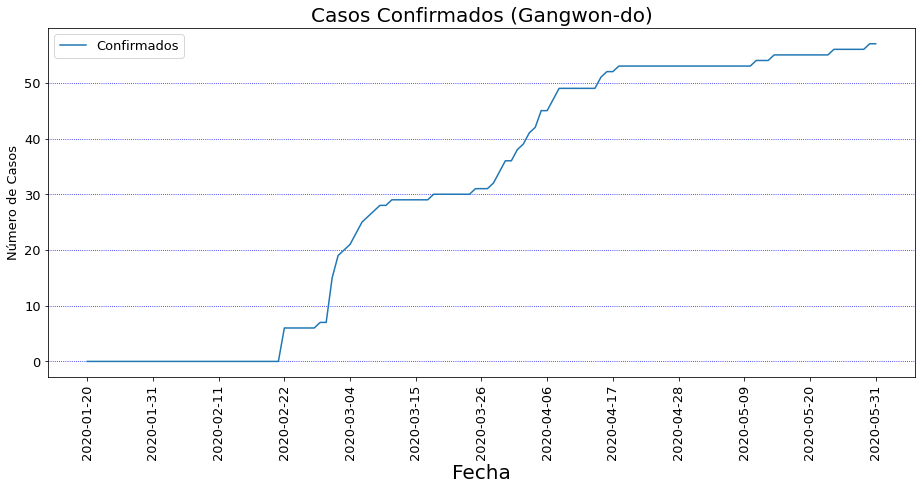

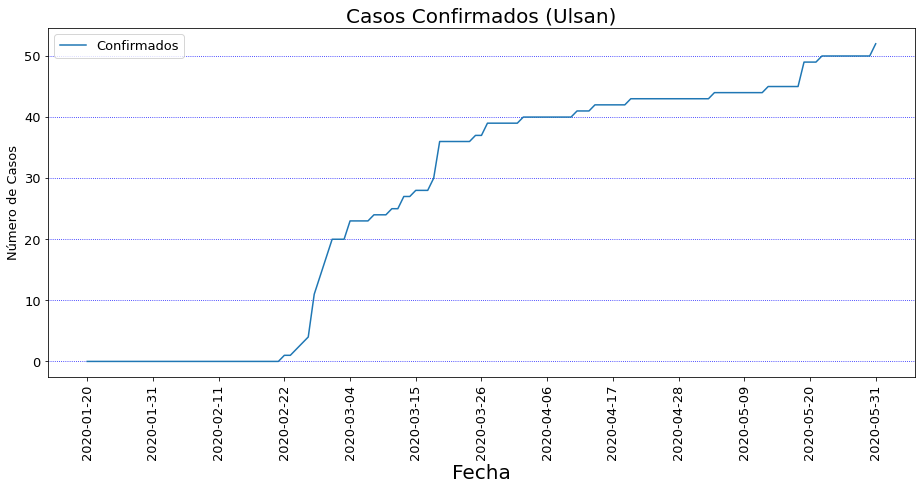

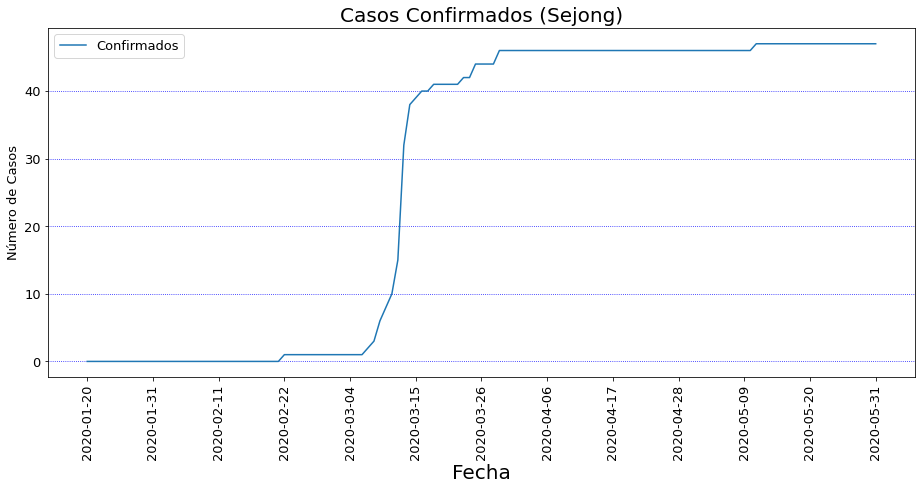

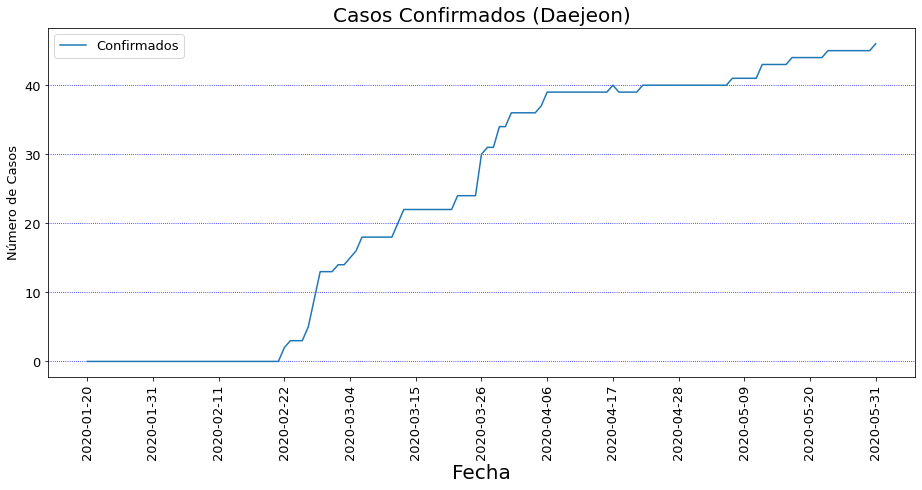

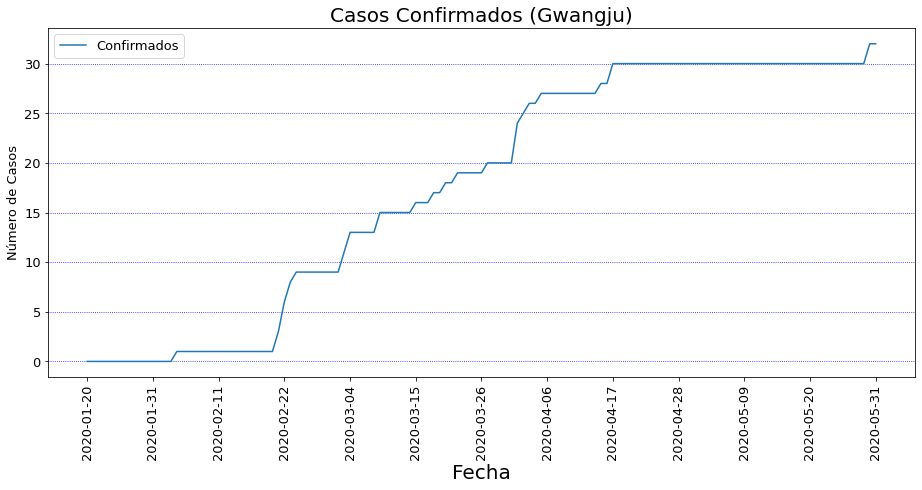

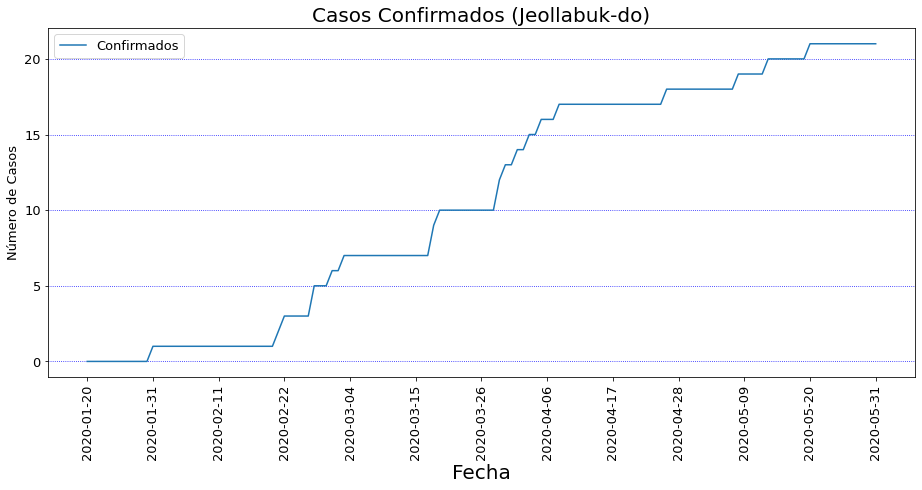

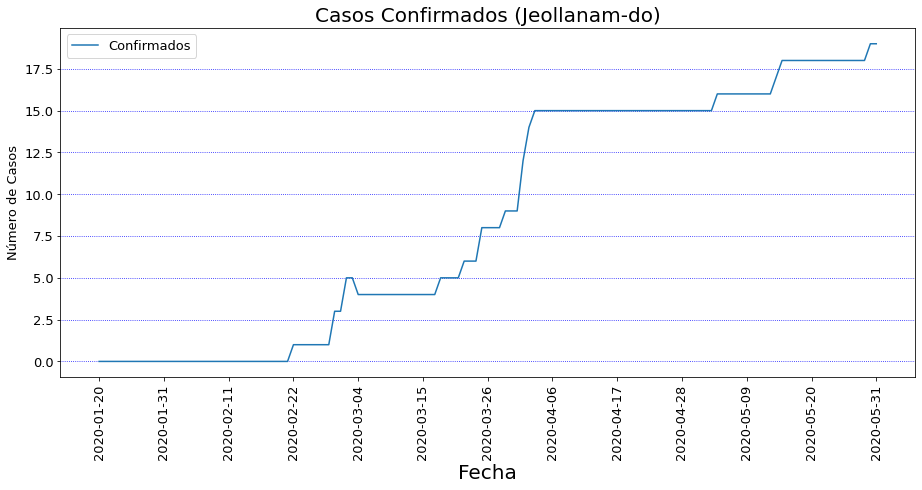

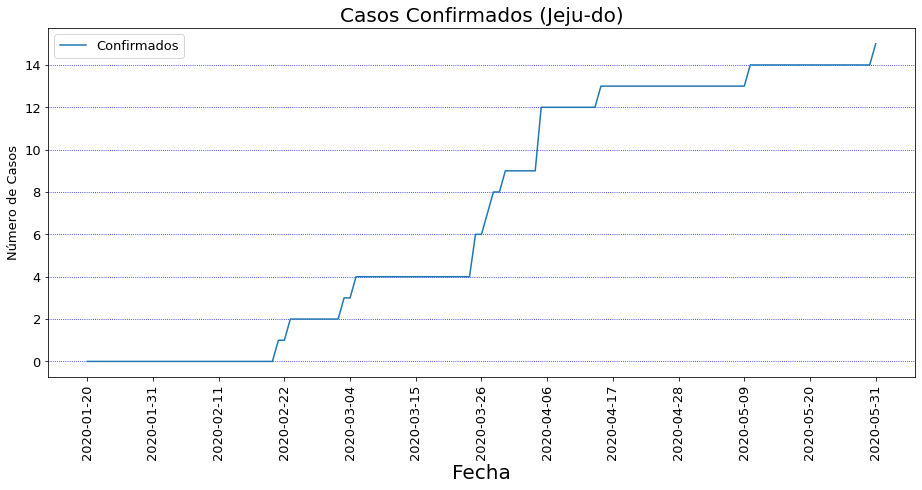

In [ ]:
# 17 GRÁFICOS DE CASOS CONFIRMADOS (UNO POR CADA PROVINCIA)
#if not fast:
# LISTA DE PROVINCIAS
lista_provincias = provincias_temp[provincias_temp.date==provincias_temp.date.iloc[-1]]\
               .sort_values('confirmed', ascending = False)\
               .province

# GRÁFICOS PARA CADA PROVINCIA
for loc_name in lista_provincias:
    
    fig, ax = plt.subplots(figsize=(13, 7))
    plt.title(f'Casos Confirmados ({loc_name})', fontsize=20)
    ax.set_xlabel('Fecha', size=20)
    ax.set_ylabel('Número de Casos', size=13)
    lista_provincias_temp = provincias_temp[provincias_temp.province==loc_name]
    plt.plot(lista_provincias_temp.date.unique(), lista_provincias_temp.confirmed)
    ax.set_xticks(ax.get_xticks()[::11])
    plt.xticks(rotation=90)
    plt.legend(['Confirmados'])
    ax.grid(axis='y',linestyle='dotted', color='b')
    plt.show()

Alrededor del **75%** de todos los casos confirmados, están concentrados en dos ciudades: **Daegu** y **Gyeongsangbuk-do**. Podemos tratar a estas 2 ciudades como datos atípicos (outliers). Veamos como quedaría el gráfico sin estas dos ciudades:

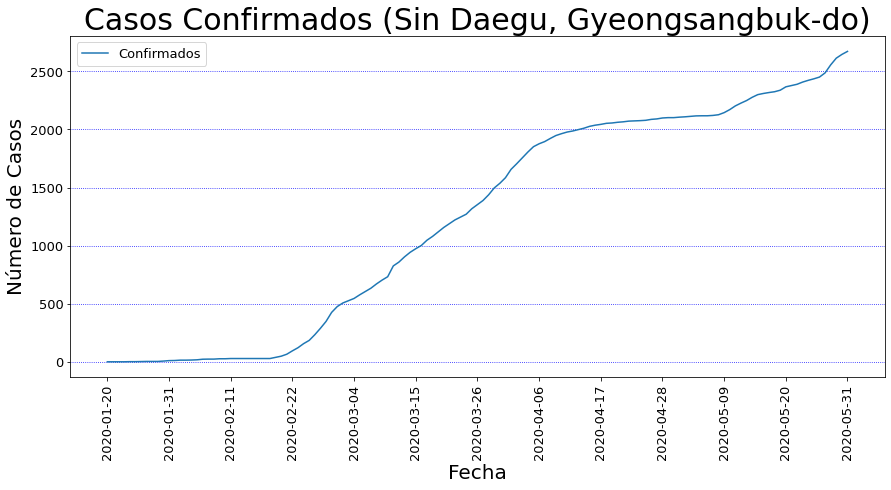

In [ ]:
# DATOS PARA AL GRAFICO SIN LAS 2 CIUDADES OUTLIERS (Daegu y Gyeongsangbuk-do)
SIN_outliers = provincias_temp[(provincias_temp.province!='Daegu') 
                           & (provincias_temp.province!='Gyeongsangbuk-do')
                          ].groupby('date').sum().confirmed
#GRÁFICO
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Casos Confirmados (Sin Daegu, Gyeongsangbuk-do)', fontsize=30)
ax.set_xlabel('Fecha', size=20)
ax.set_ylabel('Número de Casos', size=20)
plt.plot(provincias_temp.date.unique(), SIN_outliers)
ax.set_xticks(ax.get_xticks()[::11])
plt.xticks(rotation=90)
plt.legend(['Confirmados'])
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

Ahora representemos las tres opciones: Total, solo los 2 Outliers y SIN los 2 outliers:

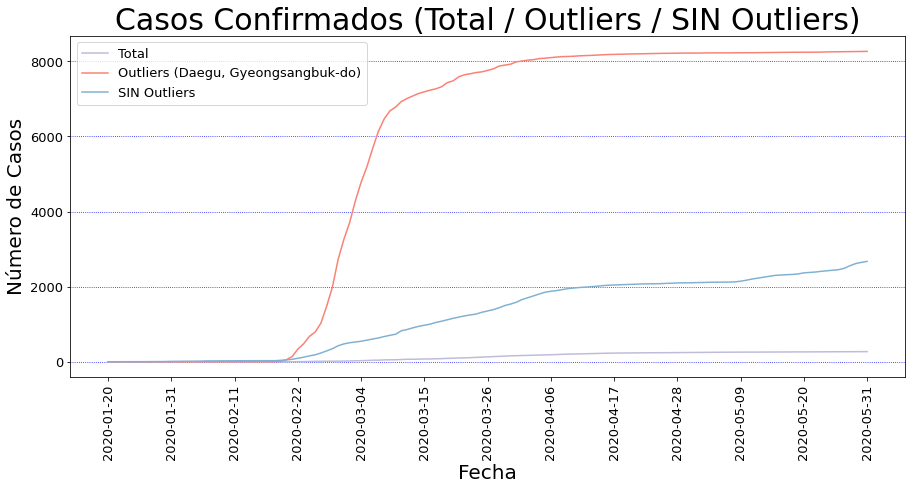

In [ ]:
# GRÁFICO CON LAS 3 OPCIONES: TOTAL, SOLO 2 OUTLIERS Y SIN OUTLIERS
# DATOS PARA AL GRAFICO SOLO CON LAS 2 CIUDADES OUTLIERS (Daegu y Gyeongsangbuk-do)
outliers = provincias_temp[(provincias_temp.province=='Daegu')\
                        | (provincias_temp.province=='Gyeongsangbuk-do')
                       ].groupby('date').sum().confirmed
# GRÁFICO
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Casos Confirmados (Total / Outliers / SIN Outliers)', fontsize=30)
plt.plot(provincias_temp.date.unique(), total_list, color=color_list[2])
plt.plot(provincias_temp.date.unique(), outliers, color=color_list[3])
plt.plot(provincias_temp.date.unique(), SIN_outliers, color=color_list[4])
ax.set_xticks(ax.get_xticks()[::11])
plt.xlabel('Fecha', size=20)
plt.ylabel('Número de Casos',size=20)
plt.xticks(rotation=90)
plt.legend(['Total', 'Outliers (Daegu, Gyeongsangbuk-do)', 'SIN Outliers'])
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

1. •	El primer aplanamiento en la curva **Total** es debido principalmente a la disminución de la curva de los **2 Outliers** desde **2020-03-08** a **2020-04-06**.
2. El número de casos de la curva **SIN Outliers** aumenta linealmente hasta el  **2020-04-06**. Y la curva empieza a aplanarse después de esa fecha, mientras que la curva de los 2 Outliers se aplanó más.
3. La curva **SIN Outliers** se desplaza hacia arriba a partir del  **2020-05-09** nuevamente, lo que hace que la curva **Total** también aumente.

###2.3 ANÁLISIS POR PROVINCIAS Y DENSIDAD DE POBLACIÓN

En los siguientes análisis vamos a tener en cuenta los datos de **densidad de población** por provincia. Para ello, obtendremos LOS datos de densidadES POR PROVINCIA de la web: http://index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1007

Vamos a crear un dataframe llamado **densidad_poblacion**, con la población y densidad de cada provincia

Unidad: **1.000 personas, persona / KM²**

#### **Preparación de los datos**

In [ ]:
# CREAMOS UN DATAFRAME CON UNA NUEVA COLUMNA: RATIO CONFIRMADOS POR PROVINCIAS
# BORRAMOS LOS CAMPOS date Y time POR NO SER NECESARIOS
provincias = provincias_temp[provincias_temp.date==provincias_temp.date.iloc[-1]]
del provincias['date']
del provincias['time']
provincias = provincias.iloc[:, :2]
# CÁLCULO RATIO CONFIRMADOS POR PROVINCIAS
provincias['conf_ratio_prov'] = round(provincias.confirmed / sum(provincias.confirmed) * 100, 2)
provincias = provincias.sort_values('conf_ratio_prov', ascending=False)
provincias.set_index(np.arange(1, len(provincias)+1), inplace=True)
provincias_all = provincias.copy()
provincias_all

,province,confirmed,conf_ratio_prov
1,Daegu,6883,62.95
2,Gyeongsangbuk-do,1379,12.61
3,Seoul,861,7.87
4,Gyeonggi-do,840,7.68
5,Incheon,206,1.88
6,Busan,147,1.34
7,Chungcheongnam-do,146,1.34
8,Gyeongsangnam-do,123,1.12
9,Chungcheongbuk-do,60,0.55
10,Gangwon-do,57,0.52


In [ ]:
# DATAFRAME "densidad_poblacion"
densidad_poblacion = pd.DataFrame()
densidad_poblacion['provincia'] = provincias_all.province
densidad_poblacion['confirmed'] = provincias_all.confirmed
# DATOS DE DENSIDAD POR PROVINCIA OBTENIDOS DE LA WEB
densidad_poblacion['poblacion'] = np.divide(
    [2450, 2674, 9705, 13031, 2939, 3400
     , 2180, 3356, 1619, 1521, 1154, 304
     , 1518, 1493, 1820, 1790, 653]
     , 1000) # mil x millón
# DENSIDAD = NÚMERO DE PERSONAS / KM²
densidad_poblacion['densidad'] = [2773, 141, 16034, 1279, 2764, 4416, 265, 318, 219, 90, 1088, 653, 2813, 2980, 226, 145, 353]
densidad_poblacion

,provincia,confirmed,poblacion,densidad
1,Daegu,6883,2.450,2773
2,Gyeongsangbuk-do,1379,2.674,141
3,Seoul,861,9.705,16034
4,Gyeonggi-do,840,13.031,1279
5,Incheon,206,2.939,2764
6,Busan,147,3.400,4416
7,Chungcheongnam-do,146,2.180,265
8,Gyeongsangnam-do,123,3.356,318
9,Chungcheongbuk-do,60,1.619,219
10,Gangwon-do,57,1.521,90


---------Unidad: **1.000 personas, persona / KM²**


#### **Población por Provincia (Ordenado Casos Confirmados - Mayor/Menor)**

Vamos a representar la Población por Provincia (Ordenado Casos Confirmados - Mayor/Menor)

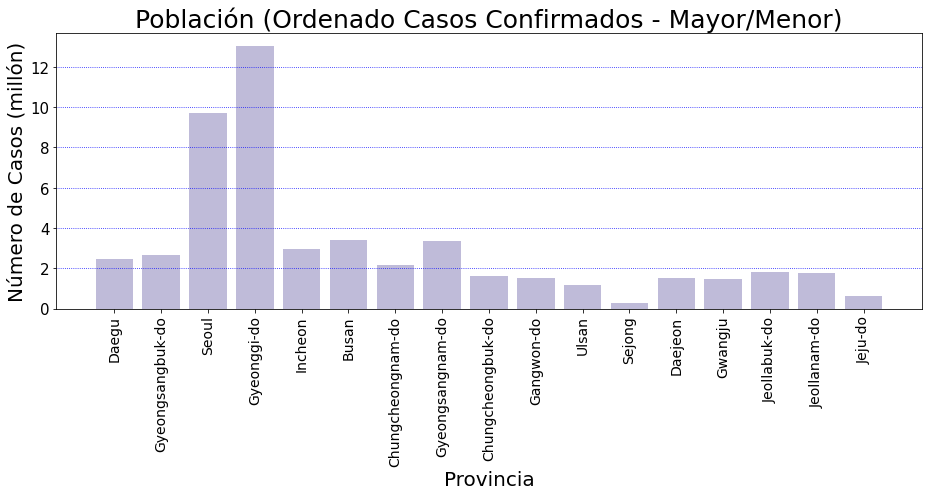

In [ ]:
# GRÁFICO POBLACIÓN POR PROVINCIA (ORDENADO CASOS CONFIRMADOS - MAYOR/MENOR)
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Población (Ordenado Casos Confirmados - Mayor/Menor)', fontsize=25)
plt.bar(densidad_poblacion.provincia, densidad_poblacion.poblacion, color=color_list[2])
plt.xticks(rotation=90)
plt.xticks(size=14)
plt.yticks(size=15)
plt.xlabel('Provincia', size=20)
plt.ylabel('Número de Casos (millón)', size=20)
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

#### **Densidad de Población Ordenado Casos Confirmados - Mayor/Menor**

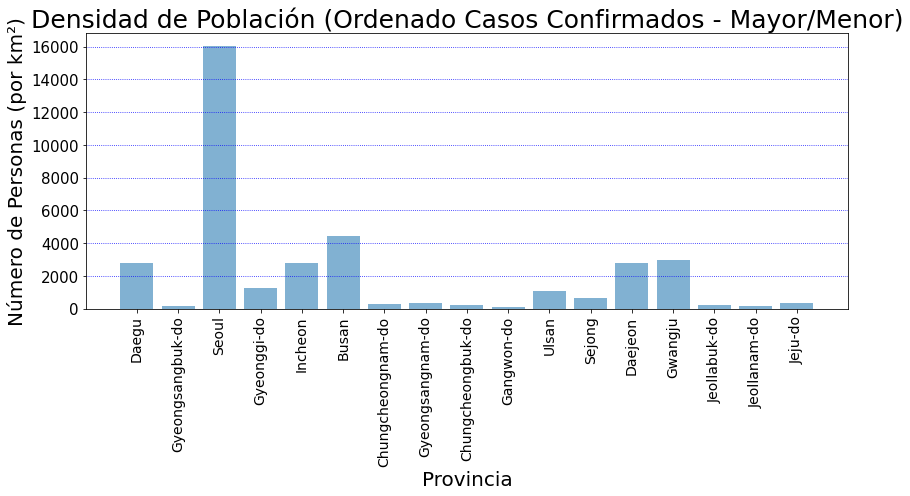

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Densidad de Población (Ordenado Casos Confirmados - Mayor/Menor)', fontsize=25)
plt.bar(densidad_poblacion.provincia, densidad_poblacion.densidad, color=color_list[4])
plt.xticks(rotation=90)
plt.xticks(size=14)
plt.yticks(size=15)
plt.ylabel('Número de Personas (por km²)', size=20)
plt.xlabel('Provincia', size=20)
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

1. Hay una correlación, cuanta más población, más infecciones (excluyendo los 2 valores atípicos, ya que la infección se debió a unas concentraciones de gente por unos eventos)
2. La **densidad de población** parece no tener correlación con los casos confirmados. Lo que sí está más claro es la tendencia de que las áreas urbanas tienen muchos más casos que las rurales.
3. **Seúl** es el caso atípico entre estas ciudades, ya que al ser la capital de Corea del Sur, es una provincia muy concurrida, pero en cambio, tiene una tasa de infección relativamente baja. Seguramente, se tomaron ciertas medidas por el Gobierno que influyeron en esto.

Vemaos estos 2 gráficos juntos

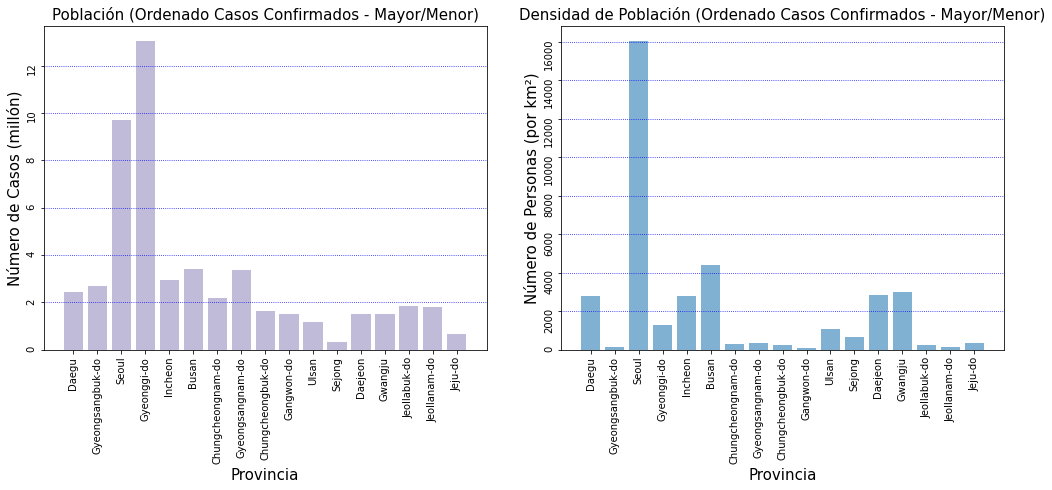

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# GRÁFICO POBLACIÓN POR PROVINCIA (ORDENADO CASOS CONFIRMADOS - MAYOR/MENOR)

axes[0].set_title('Población (Ordenado Casos Confirmados - Mayor/Menor)', fontsize=15)
axes[0].bar(densidad_poblacion.provincia, densidad_poblacion.poblacion, color=color_list[2])
axes[0].set_xlabel('Provincia', size=15)
axes[0].tick_params(axis="x", labelsize=10)
axes[0].tick_params(axis="y", labelsize=10)
axes[0].tick_params(rotation=90)
axes[0].set_ylabel('Número de Casos (millón)', size=15)
axes[0].grid(axis='y',linestyle='dotted', color='b')

# GRÁFICO DENSIDAD DE POBLACIÓN (ORDENADO CASOS CONFIRMADOS - MAYOR/MENOR)

axes[1].set_title('Densidad de Población (Ordenado Casos Confirmados - Mayor/Menor)', fontsize=15)
axes[1].bar(densidad_poblacion.provincia, densidad_poblacion.densidad, color=color_list[4])
axes[1].set_xlabel('Provincia', size=15)
axes[1].tick_params(axis="x", labelsize=10)
axes[1].tick_params(axis="y", labelsize=10)
axes[1].tick_params(rotation=90)
axes[1].set_ylabel('Número de Personas (por km²)', size=15)
axes[1].grid(axis='y',linestyle='dotted', color='b')


# 3.ANÁLISIS POR GÉNERO

### PREPARACIÓN DE LOS DATOS

En este apartado vamos a analizar los datos epidemiológicos por Sexo. Disponemos del fichero **TimeGender.csv**, con datos de casos confirmados y fallecidos por fecha. Los campos son:

- **date**: Tipo Fecha. Indica la fecha en la que se detectaron los casos
- **time**: Tipo Hora. Indica la Hora en la que ocurrieron los casos
- **sex**: Tipo Alfanumérico. Indica el sexo de la persona infectada
- **confirmed**: Tipo Numérico. Cantidad de casos confirmados (infectados)
- **deceased**: Tipo Numérico. Cantidad de fallecidos

CARGAMOS EL FICHERO **TimeGender.csv** y creamos el dataframe **sexo_temp**

In [ ]:
# CARGAMOS DATOS DESDE EL FICHERO TimeGender.csv
from google.colab import files

uploaded = files.upload()

for TimeGender in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=TimeGender, length=len(uploaded[TimeGender])))

Saving TimeGender.csv to TimeGender.csv
User uploaded file "TimeGender.csv" with length 5233 bytes


In [ ]:
# CARGAMOS LOS DATOS AL DATAFRAME "sexo_temp"
import pandas as pd
import io
sexo_temp = pd.read_csv(io.StringIO(uploaded[TimeGender].decode('utf-8')))
sexo_temp

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
177,2020-05-29,0,female,6643,127
178,2020-05-30,0,male,4780,142
179,2020-05-30,0,female,6661,127
180,2020-05-31,0,male,4795,143


**DATOS BÁSICOS**

In [ ]:
d1_4 = sexo_temp.min().date
d2_4 = sexo_temp.max().date
print('PERIODO: desde ', d1_4, 'al ', d2_4)
print('Nº DE DÍAS: ', restar_fechas(d1_4, d2_4))
print('Nº DE REGISTROS: ', len(sexo_temp.index))
print('Nº DE CAMPOS: ', len(sexo_temp.columns))
print('SEXO: ', sexo_temp.sex.unique())
sexo_temp.dtypes

PERIODO: desde  2020-03-02 al  2020-05-31
Nº DE DÍAS:  90
Nº DE REGISTROS:  182
Nº DE CAMPOS:  5
SEXO:  ['male' 'female']


date         object
time          int64
sex          object
confirmed     int64
deceased      int64
dtype: object

### ANALÍTICA DESCRIPTIVA

#### **Casos Confirmados por sexo**

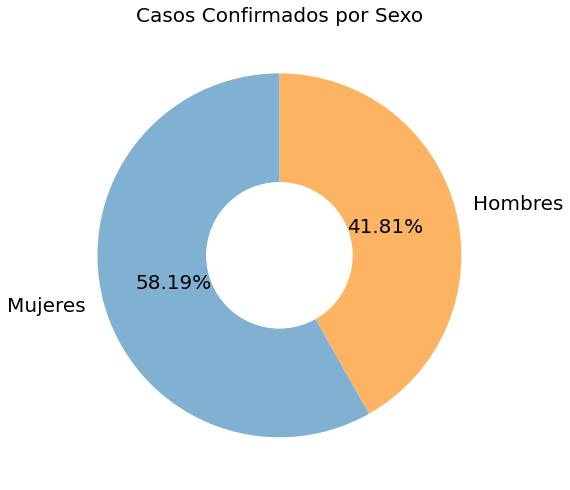

In [ ]:
# GRÁFICO PORCENTAJE CASOS CONFIRMADOS POR SEXO
color_pie = [color_list[5], color_list[4]]
fig, ax = plt.subplots(figsize=(9, 7))
plt.title(f'Casos Confirmados por Sexo', fontsize=20)
pop_circle=plt.Circle((0,0), 0.40, color='white')
plt.pie(sexo_temp.confirmed[-2:]
        , labels=['Hombres', 'Mujeres']
        , autopct='%.2f%%'
        , colors = color_pie
        , startangle=90
        , counterclock=False
        , textprops={'fontsize': 20})
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

#### **Casos Confirmados por Fecha y Sexo (Acumulado)**

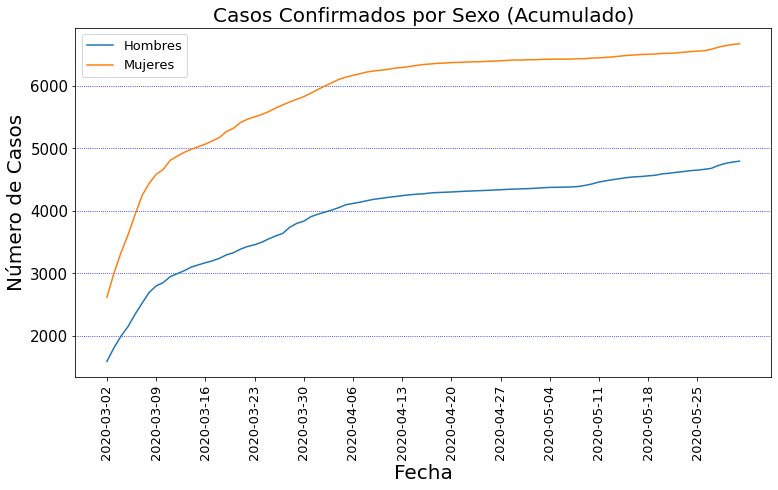

In [ ]:
# GRÁFICO PORCENTAJE CASOS CONFIRMADOS POR FECHA Y SEXO (ACUMULADO)
fig, ax = plt.subplots(figsize=(11, 7))
plt.title('Casos Confirmados por Sexo (Acumulado)', fontsize=20)
sexo_conf = (sexo_temp[sexo_temp.sex=='male'].confirmed, sexo_temp[sexo_temp.sex=='female'].confirmed)
for sex_each, sex_label in zip(sexo_conf, ['Hombres', 'Mujeres']):
    plt.plot(sexo_temp.date.unique(), sex_each, label=sex_label)
ax.set_xticks(ax.get_xticks()[::7])
plt.yticks(size=15)
plt.xlabel('Fecha',size=20)
plt.ylabel('Número de Casos',size=20)
plt.xticks(rotation=90)
ax.legend()
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

1. El número de casos de mujeres confirmadas es mayor que el de hombres.
2. El gap de casos se estabiliza a partir del **2020-04-06** aproximadamente.

#### **Casos Fallecidos por sexo**

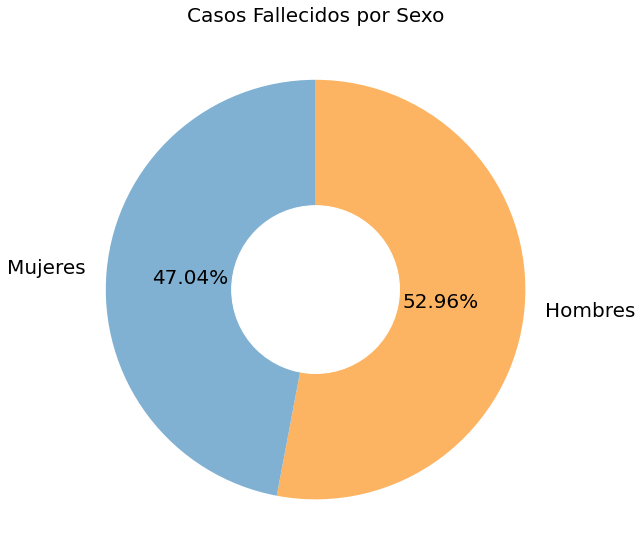

In [ ]:
# GRÁFICO PORCENTAJE CASOS FALLECIDOS POR SEXO
color_pie = [color_list[5], color_list[4]]
fig, ax = plt.subplots(figsize=(9, 9))
plt.title(f'Casos Fallecidos por Sexo', fontsize=20)
pop_circle=plt.Circle((0,0), 0.40, color='white')
plt.pie(sexo_temp.deceased[-2:]
        , labels=['Hombres', 'Mujeres']
        , autopct='%.2f%%'
        , colors = color_pie
        , startangle=90
        , counterclock=False
        , textprops={'fontsize': 20})
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

#### **Casos Fallecidos por Fecha y Sexo (Acumulado)**

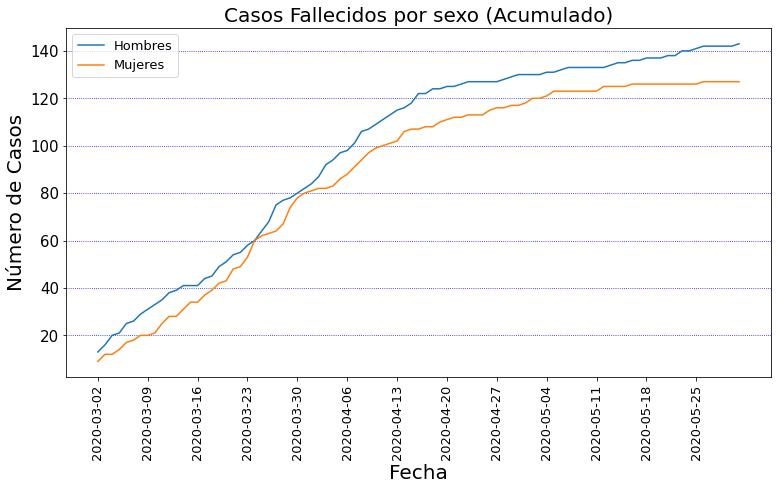

In [ ]:
# GRÁFICO PORCENTAJE CASOS FALLECIDOS POR FECHA Y SEXO (ACUMULADO)
fig, ax = plt.subplots(figsize=(11, 7))
plt.title('Casos Fallecidos por sexo (Acumulado)', fontsize=20)
sexo_falle = (sexo_temp[sexo_temp.sex=='male'].deceased, sexo_temp[sexo_temp.sex=='female'].deceased)

for sex_each, sex_label in zip(sexo_falle, ['Hombres', 'Mujeres']):
    plt.plot(sexo_temp.date.unique(), sex_each, label=sex_label)
ax.set_xticks(ax.get_xticks()[::7])
plt.yticks(size=15)
plt.xlabel('Fecha',size=20)
plt.ylabel('Número de Casos', size=20)
plt.xticks(rotation=90)
ax.legend()
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

Análisis:

1. El número de hombres fallecidos es mayor que el de mujeres durante todo el intervalo de fechas.
2. El gap es más estrecho que para los casos confirmados.

# 4.ANÁLISIS POR TEST REALIZADOS

### PREPARACIÓN DE LOS DATOS

En este apartado vamos a analizar los datos según lo test realizados. Disponemos del fichero **Time.csv**, con datos de test realizados, nº de negativos, casos confirmados, recuperados y fallecidos por fecha. Los campos son:

- **date**: Tipo Fecha. Indica la fecha en la que se detectaron los casos
- **time**: Tipo Hora. Indica la Hora en la que ocurrieron los casos 
- **test**: Tipo Numérico. Cantidad de test realizados
- **negative**: Tipo Numérico. Cantidad de test con resultado negativo
- **confirmed**: Tipo Numérico. Cantidad de casos confirmados (infectados)
- **released**: Tipo Numérico. Cantidad de personas curadas
- **deceased**: Tipo Numérico. Cantidad de fallecidos

CARGAMOS EL FICHERO **Time.csv**

In [ ]:
# CARGAMOS DATOS DESDE EL FICHERO Time.csv
from google.colab import files

uploaded = files.upload()

for Time in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=Time, length=len(uploaded[Time])))

Saving Time.csv to Time.csv
User uploaded file "Time.csv" with length 5238 bytes


In [ ]:
# CARGAMOS LOS DATOS AL DATAFRAME "test_temp"
import pandas as pd
import io
test_temp = pd.read_csv(io.StringIO(uploaded[Time].decode('utf-8')))
test_temp

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
128,2020-05-27,0,852876,820550,11265,10295,269
129,2020-05-28,0,868666,834952,11344,10340,269
130,2020-05-29,0,885120,849161,11402,10363,269
131,2020-05-30,0,902901,865162,11441,10398,269


**DATOS BÁSICOS**

In [ ]:
d1_5 = test_temp.min().date
d2_5 = test_temp.max().date
print('PERIODO: desde ', d1_5, 'al ', d2_5)
print('Nº DE DÍAS: ', restar_fechas(d1_5, d2_5))
print('Nº DE REGISTROS: ', len(test_temp.index))
print('Nº DE CAMPOS: ', len(test_temp.columns))
test_temp.dtypes

PERIODO: desde  2020-01-20 al  2020-05-31
Nº DE DÍAS:  132
Nº DE REGISTROS:  133
Nº DE CAMPOS:  7


date         object
time          int64
test          int64
negative      int64
confirmed     int64
released      int64
deceased      int64
dtype: object

## ANALÍTICA DESCRIPTIVA

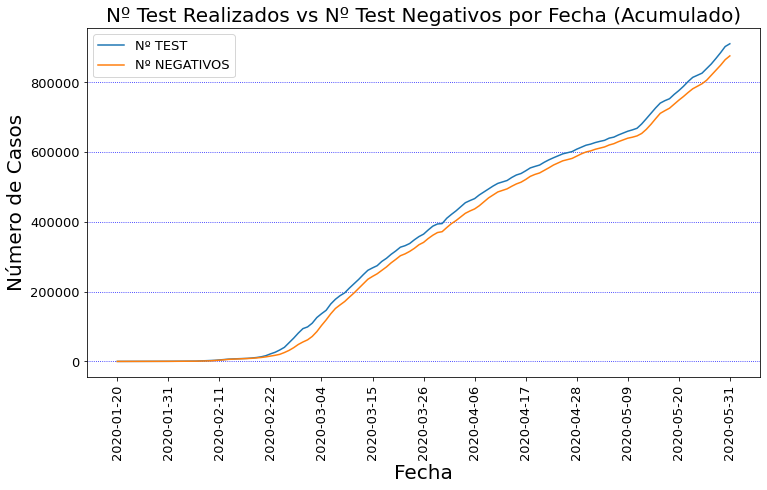

In [ ]:
# TOTAL Nº DE TEST vs Nº DE TEST NEGATIVOS

fig, ax = plt.subplots(figsize=(11, 7))
plt.title('Nº Test Realizados vs Nº Test Negativos por Fecha (Acumulado)', fontsize=20)
ax.set_xlabel('Fecha', size=20)
ax.set_ylabel('Número de Casos', size=20)
plt.plot(test_temp.date.unique()
         , test_temp.groupby('date').sum().test)
plt.plot(test_temp.date.unique()
         , test_temp.groupby('date').sum().negative)
ax.set_xticks(ax.get_xticks()[::11])
plt.xticks(rotation=90)
plt.legend(['Nº TEST', 'Nº NEGATIVOS'])
ax.grid(axis='y',linestyle='dotted', color='b')
plt.show()

**COMPARATIVA**: Vamos a representar los campos **test**, **negative**, **confirmed**, **released** y **deceased**, en diferentes gráficos:

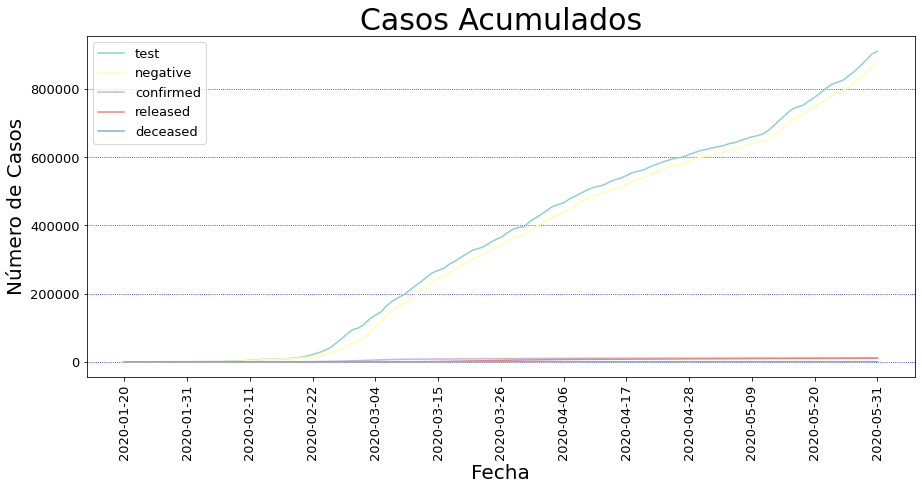

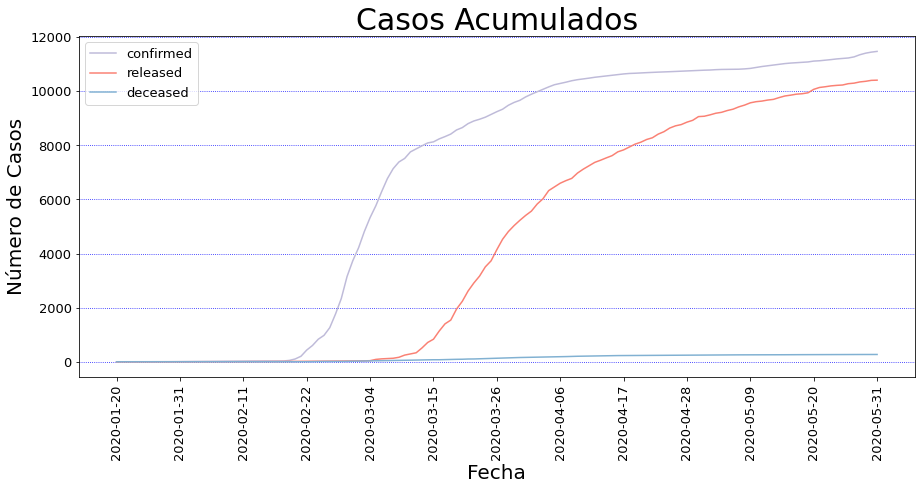

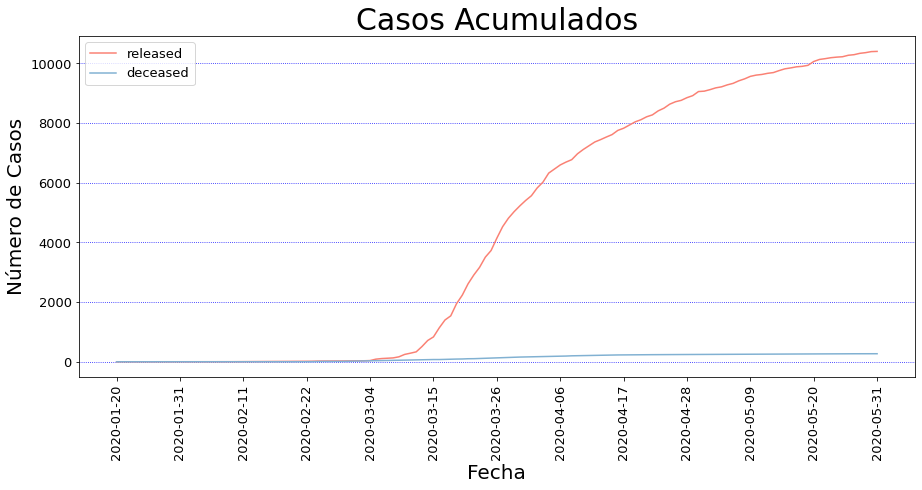

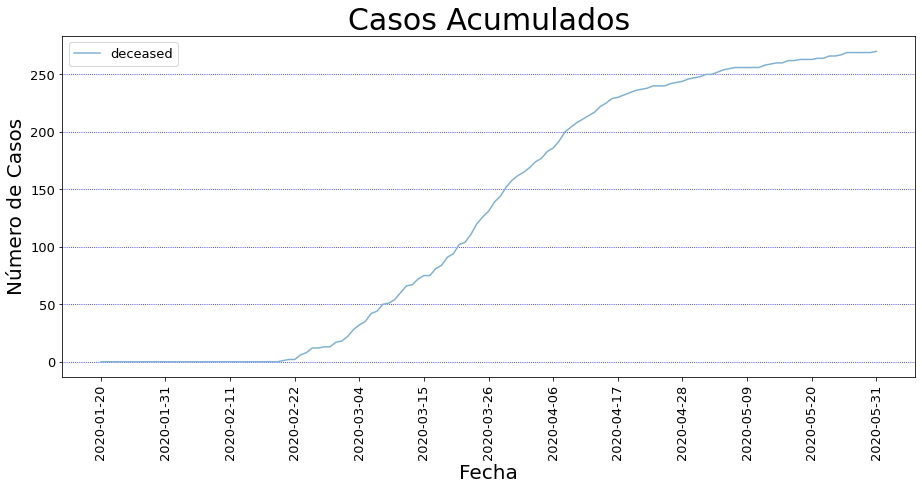

In [ ]:
# GRÁFICOS ACUMULADOS DE CASOS: CONFIRMADOS, FALLECIDOS Y RECUPERADOS, CANTIDAD DE TEST Y RESULTADOS
def plot_test(data, column_list, column_max, case_type):
    for i in column_list:
        fig, ax = plt.subplots(figsize=(13, 7))
        plt.title(f'{case_type} Acumulados', fontsize=30)
        color_group = color_list[:-4][-(column_max-i):]
        for test_each, color_each in zip(data.columns[i:column_max], color_group):
            plt.plot(data.date, data[test_each], label=test_each
                     , color=color_each
                    )
            label=data[test_each]
        ax.set_xticks(ax.get_xticks()[::11])
        plt.xticks(rotation=90)
        plt.xlabel('Fecha', size=20)
        plt.ylabel('Número de Casos', size=20)
        ax.legend()
        ax.grid(axis='y',linestyle='dotted', color='b')
        plt.show()

plot_test(test_temp, [2, 4, 5, 6], 7, 'Casos')

**RATIOS GENERALES**

In [ ]:
# DATOS TOTALES DE CADA CAMPO
totales = test_temp[-1:]
totales

,date,time,test,negative,confirmed,released,deceased
132,2020-05-31,0,910822,876060,11468,10405,270


Vamos  calcular los ratios siguientes:

- **ntest_ratio** =  (Total Test Realizados)/(Población Total)  *100 - Porcentaje de test realizados a la población
- **neg_ratio_test** =  (Total Negativos)/(Total Test Realizados)  *100 - Porcentaje de estos test que han siso negativos

Calculamos lo porcentajes de casos confirmados, fallecidos y recuperados, respecto al total de test realizados:

- **conf_ratio_test** =  (Total Confirmados)/(Total Test Realizados)  *100
- **falle_ratio** =  (Total Fallecidos)/(Total Test Confirmados)  *100
- **recup_ratio** =  (Total Recuperados)/(Total Test Confirmados)  *100

In [ ]:
# CÁLCULO DE LA POBLACIÓN TOTAL
pob_total = sum(edades_poblacion.poblacion)
print('POBLACIÓN TOTAL:', pob_total,' de habitantes')

POBLACIÓN TOTAL: 51780579  de habitantes


In [ ]:
# CÁLCULO DE LOS RATIOS
pd.set_option('mode.chained_assignment', None)
# CÁLCULO DEL RATIO DE TEST REALIZADOS A LA POBLACIÓN
ratios_totales = totales
ratios_totales['ntest_ratio'] = ratios_totales.test/pob_total * 100
# CÁLCULO DEL RATIO DE CONFIRMADOS DE LA POBLACIÓN
ratios_totales['conf_ratio_test'] = ratios_totales.confirmed/ratios_totales.test * 100 # TOTAL TEST
# CÁLCULO DEL RATIO DE CASOS NEGATIVOS DE LA POBLACIÓN
ratios_totales['nega_ratio_test'] = ratios_totales.negative/(ratios_totales.test) * 100 # TOTAL TEST
# CÁLCULO DEL RATIO DE FALLECIDOS DE LA POBLACIÓN
ratios_totales['falle_ratio'] = ratios_totales.deceased/(ratios_totales.confirmed) * 100
# CÁLCULO DEL RATIO DE FALLECIDOS DE LA POBLACIÓN
ratios_totales['recup_ratio'] = ratios_totales.released/(ratios_totales.confirmed) * 100
ratios_totales

,date,time,test,negative,confirmed,released,deceased,ntest_ratio,conf_ratio_test,nega_ratio_test,falle_ratio,recup_ratio
132,2020-05-31,0,910822,876060,11468,10405,270,1.759003,1.259082,96.183447,2.354377,90.730729


# 5.ANÁLISIS POR LUGARES DE CONTAGIO

## PREPARACIÓN DE LOS DATOS

En este apartado vamos a analizar los datos epidemiológicos por Lugares de contagio. Disponemos del fichero **Case.csv**, con datos de casos confirmados. Los campos son:

- **case_id**: Tipo Numérico (Clave única). Identificador del caso de contagio
- **province**: Tipo Alfanumérico. Indica la Provincia de la persona infectada
- **city**: Tipo Alfanumérico. Indica la Ciudad de la persona infectada
- **group**: Tipo Alfanumérico. Indica el tipo de contagio: en grupo o individual.
- **infection_case**: Tipo Alfanumérico. Indica el lugar del contagio
- **confirmed**: Tipo Numérico. Cantidad de casos confirmados (infectados)
- **latitude**: Tipo Numérico. Coordenadas de latitud del lugar de contagio
- **longitude**: Tipo Numérico. Coordenadas de longitud del lugar de contagio

CARGAMOS EL FICHERO **Case.csv**

In [ ]:
# CARGAMOS DATOS DESDE EL FICHERO Case.csv
from google.colab import files

uploaded = files.upload()

for Case in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=Case, length=len(uploaded[Case])))

Saving Case.csv to Case.csv
User uploaded file "Case.csv" with length 8349 bytes


In [ ]:
# Cargar los datos al DataFrame provincias
import pandas as pd
import io
casos_temp = pd.read_csv(io.StringIO(uploaded[Case].decode('utf-8')))
casos_temp

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652
1,1000002,Seoul,Guro-gu,True,Guro-gu Call Center,99.0,37.508163,126.884387
2,1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20.0,37.592888,127.056766
3,1000004,Seoul,Guro-gu,True,Manmin Central Church,41.0,37.481059,126.894343
4,1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14.0,37.63369,126.9165
...,...,...,...,...,...,...,...,...
123,6100010,Gyeongsangnam-do,-,False,etc,19.0,-,-
124,7000001,Jeju-do,-,False,overseas inflow,10.0,-,-
125,7000002,Jeju-do,-,False,contact with patient,0.0,-,-
126,7000003,Jeju-do,-,False,etc,4.0,-,-


**DATOS BÁSICOS**

In [ ]:
print('Nº DE REGISTROS: ', len(casos_temp.index))
print('Nº DE CAMPOS: ', len(casos_temp.columns))
print('Nº DE PROVINCIAS: ', len(casos_temp['province'].unique()))
print('PROVINCIAS: ', casos_temp.province.unique())
print('CIUDADES: ', casos_temp.city.unique())
print('Nº DE LUGARES DE CONTAGIO: ', len(casos_temp['infection_case'].unique()))
print('LUGARES DE CONTAGIO: ', casos_temp.infection_case.unique())
casos_temp.info(verbose=True,null_counts=True)

Nº DE REGISTROS:  128
Nº DE CAMPOS:  8
Nº DE PROVINCIAS:  17
PROVINCIAS:  ['Seoul' 'Busan' 'Daegu' 'Gwangju' 'Incheon' 'Daejeon' 'Ulsan' 'Sejong'
 'Gyeonggi-do' 'Gangwon-do' 'Chungcheongbuk-do' 'Chungcheongnam-do'
 'Jeollabuk-do' 'Jeollanam-do' 'Gyeongsangbuk-do' 'Gyeongsangnam-do'
 'Jeju-do']
CIUDADES:  ['Yongsan-gu' 'Guro-gu' 'Dongdaemun-gu' 'Eunpyeong-gu' 'Seongdong-gu'
 'Jongno-gu' 'Gangnam-gu' 'Jung-gu' 'Seodaemun-gu' 'from other city'
 'form other city' 'Yeongdeungpo-gu' '-' 'Dongnae-gu' 'Suyeong-gu'
 'Haeundae-gu' 'Jin-gu' 'Nam-gu' 'Dalseong-gun' 'Seo-gu' 'Dong-gu'
 'Sejong' 'Bucheon-si' 'Seongnam-si' 'Uijeongbu-si' 'Suwon-si' 'Wonju-si'
 'Goesan-gun' 'Cheonan-si' 'Seosan-si' 'Muan-gun' 'Cheongdo-gun'
 'Bonghwa-gun' 'Chilgok-gun' 'Gyeongsan-si' 'Yechun-gun' 'Geochang-gun'
 'Jinju-si' 'Changwon-si' 'Changnyeong-gun']
Nº DE LUGARES DE CONTAGIO:  51
LUGARES DE CONTAGIO:  ['Itaewon Clubs' 'Guro-gu Call Center' 'Dongan Church'
 'Manmin Central Church' "Eunpyeong St. Mary's Hospital"


Vamos a ordenar el dataframe por Mayor Número de **Confirmados**, y mostraremos los **6** lugares con el mayor número de contagios.

In [ ]:
print(f'NÙMERO DE LUGARES DE INFECCIÓN: {len(casos_temp.infection_case.unique())}\n')
print('LOS 6 LUGARES CON MAYOR Nº DE CASOS CONFIRMADOS SON:')
casos_ord = casos_temp.sort_values('confirmed', ascending=False)
total = casos_ord.confirmed.sum()
# CÁLCULO ATIO CONFIRMADOS POR LUGAR DE CONTAGIO
casos_temp['conf_ratio_lugar'] = casos_temp.confirmed/total * 100
casos_ord = casos_temp.sort_values('confirmed', ascending=False)
display(casos_ord.head(6))

NÙMERO DE LUGARES DE INFECCIÓN: 51

LOS 6 LUGARES CON MAYOR Nº DE CASOS CONFIRMADOS SON:


,case_id,province,city,group,infection_case,confirmed,latitude,longitude,conf_ratio_lugar
29,1200001,Daegu,Nam-gu,True,Shincheonji Church,4510.0,35.84008,128.5667,43.516017
37,1200009,Daegu,-,False,contact with patient,920.0,-,-,8.876882
38,1200010,Daegu,-,False,etc,737.0,-,-,7.111154
102,6000001,Gyeongsangbuk-do,from other city,True,Shincheonji Church,566.0,-,-,5.461212
16,1000017,Seoul,-,False,overseas inflow,346.0,-,-,3.338479
75,2000010,Gyeonggi-do,-,False,overseas inflow,252.0,-,-,2.431494


## ANALÍTICA DESCRIPTIVA

#### LOS 6 Lugares con mayor Nº de Confirmados (Infecciones)

Vamos a representar los **6** lugares con mayor número de contagios, y el resto lo agruparemos como otros (varias provincias). Para ello crearemos un dataframe llamado

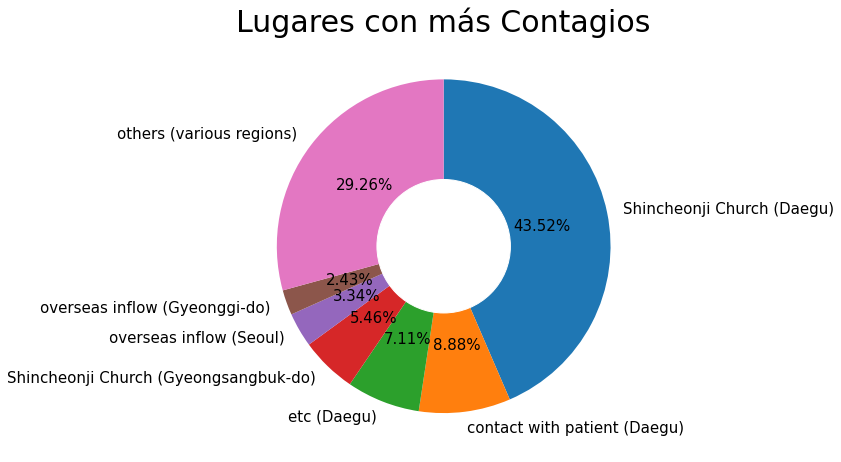

In [ ]:
# GRÁFICO CON LOS 6 LUGARES CON MAYOR Nº DE CONFIRMADOS (INFECCIONES)
casos_ord.loc[len(casos_ord), :] = casos_ord[casos_ord.confirmed<casos_ord.confirmed.iloc[5]].sum()
casos_ord.loc[len(casos_ord)-1, 'case_id'] = 0
casos_ord.loc[len(casos_ord)-1, 'province'] = 'various regions'
casos_ord.loc[len(casos_ord)-1, 'city'] = 'various cities'
casos_ord.loc[len(casos_ord)-1, 'group'] = 'various groups'
casos_ord.loc[len(casos_ord)-1, 'infection_case'] = 'others'
casos_ord.loc[len(casos_ord)-1, 'latitude'] = '-'
casos_ord.loc[len(casos_ord)-1, 'longitude'] = '-'
path_with_others = casos_ord[casos_ord.confirmed >= casos_ord.confirmed.iloc[5]]

# Plot distribution
fig, ax = plt.subplots(figsize=(11, 11))
plt.title(f'Lugares con más Contagios', fontsize=30)
pop_circle=plt.Circle((0,0), 0.40, color='white')
plt.pie(path_with_others.confirmed, autopct='%.2f%%'
        , labels=path_with_others.infection_case + ' (' + path_with_others.province + ')'
#         , explode=(0.03, 0, 0, 0, 0, 0, 0)
        , startangle=90
        , counterclock=False
        , textprops={'fontsize': 15})
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

1. Podemos ver que en la iglesia **Shincheonji**, en **Daegu** + **Gyeongsangbuk-do**, se produjeron aproximadamente el **50%** de todas las infecciones. Este grupo religioso está formado por cientos de miles de miembros en todo el país. En el apartado **2. ANÁLISIS POR CASOS/PROVINCIAS**, vimos una noticia que hablaba que **Daegu** fue la provincia con mayor nº de infecciones:

https://www.efe.com/efe/espana/sociedad/daegu-una-ciudad-golpeada-por-el-coronavirus-de-la-noche-a-manana/10004-4178571#

2. Vemos también que en **Daegu** también hubo infecciones por la causa “**contatct with patients**”, el **8,88%**, es decir, que luego se provocaron más infecciones, por el contagio de estas personas.
3. Por lo tanto, podríamos decir que el **60%** de las infecciones, se produjeron por este evento. De esto se deduce, la importancia de evitar concentraciones masivas.

Tenemos dos tipos de contagios, en **Grupo** o **Individual**

In [ ]:
# Cantidad de contagios por Tipo de contagio: Grupo o Individual
tipo_contagio = casos_temp.groupby('group').sum().sort_values('confirmed', ascending=False)
tipo_contagio.index = ['group', 'individual']
del(tipo_contagio['case_id'])
tipo_contagio

,confirmed,conf_ratio_lugar
group,7174.0,69.220378
individual,3190.0,30.779622


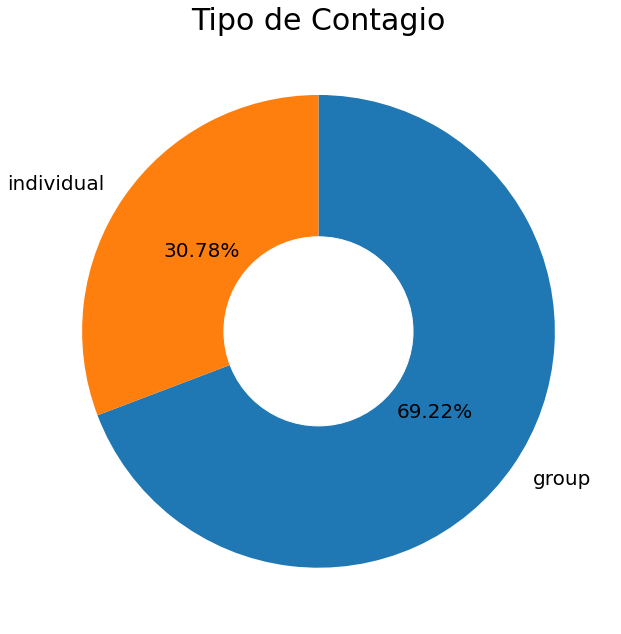

In [ ]:
# GRÁFICO POR TIPO DE CONTAGIO
fig, ax = plt.subplots(figsize=(9, 9))
plt.title(f'Tipo de Contagio', fontsize=30)
pop_circle=plt.Circle((0,0), 0.40, color='white')
plt.pie(tipo_contagio.confirmed
        , autopct='%.2f%%'
        , labels=tipo_contagio.index
        , startangle=90
        , counterclock=False
        , textprops={'fontsize': 20})
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

1. De acuerdo con lo anterior (vía de transmisión), alrededor del **70%** de las transmisiones ocurrieron en grupo
2. Esta cifra incluye otros eventos grupales como transmisiones en lugares de trabajo y clubes.
3. El primer foco de prevención debe estar en los grupos

# 6.ANÁLISIS POR DATOS METEOROLÓGICOS

En este apartado vamos a analizar los datos epidemiológicos por **Datos Meteorológicos** por fechas, desde el **2016-01-01 to 2020-05-31** (1.613 días). Disponemos del dataframe **tiempo_temp**

En este  fichero **Weather.csv** tenemos los datos Meteorológicos, por provincia y fecha. Los campos son:

- **code**: Tipo Numérico (Clave única). Identificador del registro
- **province**: Tipo Alfanumérico. Indica la Provincia de la persona infectada
- **date**: Tipo Fecha. Indica la fecha en la que se detectaron los casos
- **avg_temp**: Tipo Numérico. Promedio temperatura
- **min_temp**: Tipo Numérico. Temperatura mínima
- **max_temp**: Tipo Numérico. Temperatura máxima
- **precipitation**: Tipo Numérico. Precipitación
- **max_wind_speed**: Tipo Numérico. Velocidad máxima del viento
- **max_wind_speed**: Tipo Numérico. Velocidad máxima del viento
- **most_wind_direction**: Tipo Numérico. Dirección del viento
- **avg_relative_humidity**: Tipo Numérico. Humedad relativa

## PREPARACIÓN DE LOS DATOS

CARGAMOS EL FICHERO **Weather.csv**

In [ ]:
# CARGAMOS LOS DATOS DEL FICHERO Weather.csv
from google.colab import files

uploaded = files.upload()

for Weather in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=Weather, length=len(uploaded[Weather])))

Saving Weather.csv to Weather.csv
User uploaded file "Weather.csv" with length 1473437 bytes


In [ ]:
# CARGAMOS LOS DATOS AL DATAFRAME "tiempo_temp"
import pandas as pd
import io
tiempo_temp = pd.read_csv(io.StringIO(uploaded[Weather].decode('utf-8')))
tiempo_temp

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
25802,50000,Jeollabuk-do,2020-05-31,20.9,17.3,26.7,0.0,4.2,250.0,61.8
25803,51000,Jeollanam-do,2020-05-31,19.1,16.2,21.7,0.0,4.4,50.0,84.1
25804,60000,Gyeongsangbuk-do,2020-05-31,18.5,11.2,24.7,0.0,5.0,180.0,77.4
25805,61000,Gyeongsangnam-do,2020-05-31,19.3,14.6,24.6,0.0,4.0,140.0,71.5


Ver Nº de PROVINCIAS entre los dataframes: **PROVINCIAS_TEMP** y **TIEMPO_TEMP**

In [ ]:
## VER Nº de PROVINCIAS entre los dataframes: PROVINCIAS_TEMP y TIEMPO_TEMP
print('NÚMERO DE PROVINCIAS EN EL DATAFRAME tiempo_temp:', len(tiempo_temp.province.unique()))
print(sorted(tiempo_temp.province.unique()))
print()
print('NÚMERO DE PROVINCIAS EN EL DATAFRAME provincias_temp:', len(provincias_temp.province.unique()))
print(sorted(provincias_temp.province.unique()))

NÚMERO DE PROVINCIAS EN EL DATAFRAME tiempo_temp: 16
['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu', 'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju-do', 'Jeollabuk-do', 'Jeollanam-do', 'Seoul', 'Ulsan']

NÚMERO DE PROVINCIAS EN EL DATAFRAME provincias_temp: 17
['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu', 'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju-do', 'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan']


Vemos que la provinica de **Sejong** no está en el dataframe **tiempo_temp**

Vamos a mostrar las estadisticas

In [ ]:
tiempo_temp.loc[:,'avg_temp':].describe().T

,count,mean,std,min,25%,50%,75%,max
avg_temp,25792.0,13.693052,9.519496,-14.8,5.9,14.3,21.7,33.9
min_temp,25802.0,9.495438,9.899467,-19.2,1.3,9.7,17.9,30.3
max_temp,25804.0,18.611552,9.580450,-11.9,10.7,19.5,26.6,40.0
precipitation,25807.0,1.412508,7.991702,0.0,0.0,0.0,0.0,266.0
max_wind_speed,25798.0,5.116776,2.022527,1.0,3.8,4.7,6.0,29.4
most_wind_direction,25778.0,196.026457,106.427142,20.0,90.0,230.0,290.0,360.0
avg_relative_humidity,25787.0,65.553496,17.234220,10.4,53.4,66.6,78.6,100.0


Vamos a crear un dataframe llamado **tiempo_estad**, con las estadísticas por provincia

In [ ]:
tiempo_estad = tiempo_temp.loc[:, 'province':].groupby('province').mean()
tiempo_estad.tail(6).T

province,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Seoul,Ulsan
avg_temp,12.450899,16.428580,13.611345,14.753379,12.840546,14.290329
min_temp,9.205456,13.717483,9.189454,11.799876,8.634594,10.075883
max_temp,16.257533,19.648481,18.935028,18.354123,17.845161,19.050899
precipitation,1.185307,1.377557,1.304650,1.647799,1.393614,1.482145
max_wind_speed,5.777047,6.218165,4.317731,7.980100,4.525574,4.697830
most_wind_direction,210.297767,183.641439,204.897706,183.099814,209.422360,258.561686
avg_relative_humidity,67.441785,69.542219,71.717855,65.073945,57.565840,66.006014


## ANALÍSIS DESCRIPTIVO

Los factores que pueden influir más en la transmisión son: **Temperatura**, **Velocidad del Viento** y **Humedad Relativa**. Vamos a representarlos en gráficos de barras, por orden de mayores casos confirmados por provincias.

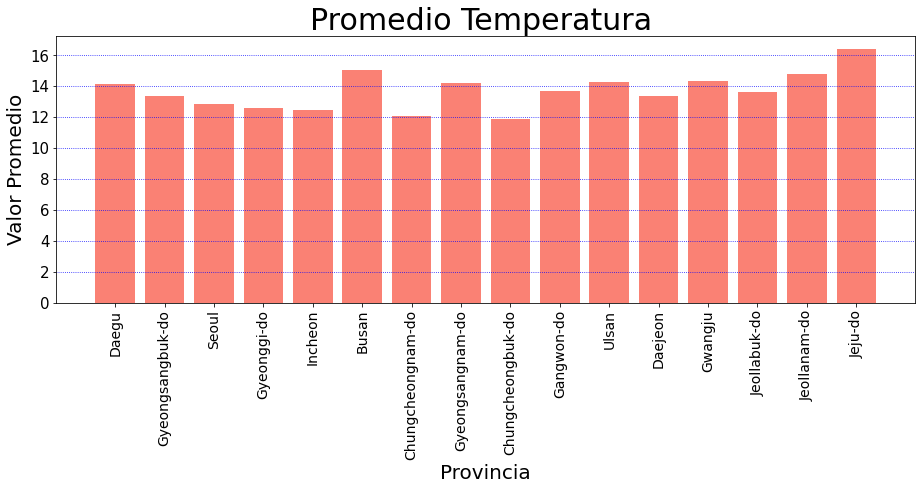

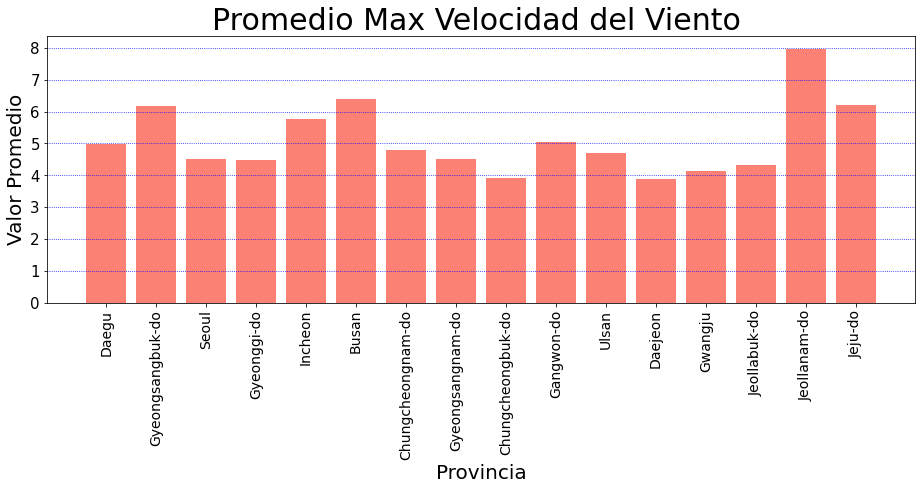

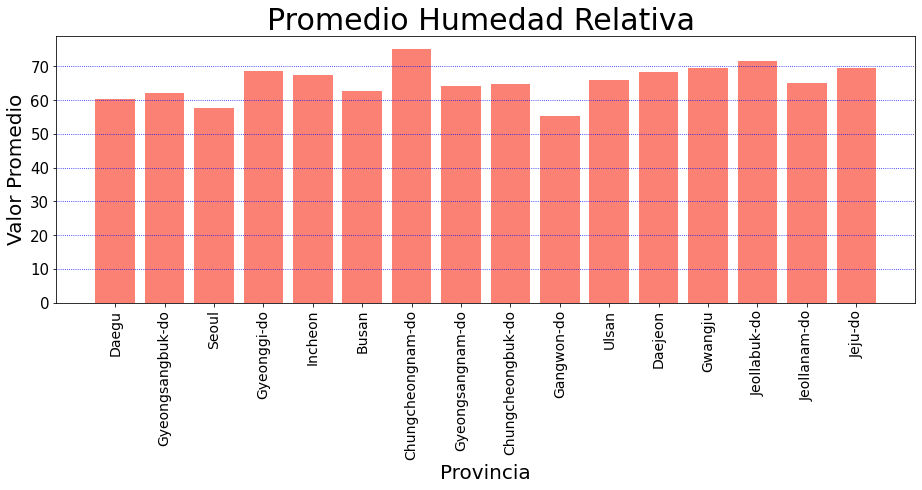

In [ ]:
# DATAFRAME CON LAS COLUMNAS: avg_temp, precipitation, max_wind_speed y avg_relative_humidity
# Nombre DATAFRAME:
tiempo_valor = pd.DataFrame(
    [tiempo_estad.index
     , tiempo_estad['avg_temp']
     , tiempo_estad['precipitation']
     , tiempo_estad['max_wind_speed']
     , tiempo_estad['avg_relative_humidity']]
    ).T
tiempo_valor.columns = ['province', 'temperature', 'precipitation'
                       , 'max_wind_speed', 'relative_humidity']

# ORDENAMOS POR CASOS CONFIRMADOS - COGEMOS EL DATAFRAME PROVINCIAS QUE CONTIENE ESTE DATO
# NO TENEMOS EN CUENTA LA PRROVINCIA DE Sejong
sorter = list(provincias.province[provincias.province != 'Sejong'].values)
tiempo_valor.province = tiempo_valor.province.astype('category')
tiempo_valor.province.cat.set_categories(sorter, inplace=True)
tiempo_valor = tiempo_valor.sort_values(['province'])
tiempo_valor.index = range(len(tiempo_valor.province.unique()))

# 3 GRÁFICOS
title_list = ['Promedio Temperatura', 'Promedio Max Velocidad del Viento', 'Promedio Humedad Relativa']
for col, title in zip(tiempo_valor.columns[[1, 3, 4]], title_list):
    plt.figure(figsize=(13, 7))
    plt.title(f'{title} ', fontsize=30)
    plt.xticks(rotation=90)
    plt.xticks(size=14)
    plt.yticks(size=15)     
    plt.bar(tiempo_valor.province, tiempo_valor[col], color=color_list[3])
    plt.xlabel('Provincia',size=20)
    plt.ylabel('Valor Promedio', size=20)
    plt.grid(axis='y',linestyle='dotted', color='b')
    plt.show()

In [ ]:
tiempo_valor

,province,temperature,precipitation,max_wind_speed,relative_humidity
0,Daegu,14.1143,1.18971,4.99529,60.2906
1,Gyeongsangbuk-do,13.3823,1.25611,6.16379,62.2845
2,Seoul,12.8405,1.39361,4.52557,57.5658
3,Gyeonggi-do,12.5965,1.47111,4.48884,68.7294
4,Incheon,12.4509,1.18531,5.77705,67.4418
5,Busan,15.0379,1.73007,6.40942,62.6539
6,Chungcheongnam-do,12.0948,1.1044,4.8059,75.3053
7,Gyeongsangnam-do,14.2312,1.72908,4.50186,64.2038
8,Chungcheongbuk-do,11.9019,1.25022,3.91587,64.8744
9,Gangwon-do,13.6709,1.47154,5.04848,55.451


1. Parece que no hay correlaciones claras. Seguir haciendo cálculos de correlaciones
2. El clima del Corea del Sur es bastante uniforme.


#### **Filtramos por los días de la Pandemia**

Ahora nos vamos a centrar desde el **2016-01-01**, que fue cuando empezó la infección del virus, para ver, si en este periodo, vamos algo en el tiempo que pueda haber influido en los contagios

In [ ]:
# CREAMOS UN NUEVO DATAFRAME A PARTIR DE LA FECHA 2020-01-20
tiempo_temp_covid = tiempo_temp[tiempo_temp.date >= '2020-01-20']
tiempo_temp_covid

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
23679,10000,Seoul,2020-01-20,0.7,-3.3,5.5,0.0,5.7,270.0,46.8
23680,11000,Busan,2020-01-20,5.1,1.6,9.8,0.0,6.1,270.0,45.6
23681,12000,Daegu,2020-01-20,4.6,2.4,8.1,0.0,6.4,290.0,44.1
23682,13000,Gwangju,2020-01-20,4.0,1.2,7.9,0.0,3.3,270.0,63.1
23683,14000,Incheon,2020-01-20,1.2,-2.1,5.1,0.0,8.6,320.0,56.0
...,...,...,...,...,...,...,...,...,...,...
25802,50000,Jeollabuk-do,2020-05-31,20.9,17.3,26.7,0.0,4.2,250.0,61.8
25803,51000,Jeollanam-do,2020-05-31,19.1,16.2,21.7,0.0,4.4,50.0,84.1
25804,60000,Gyeongsangbuk-do,2020-05-31,18.5,11.2,24.7,0.0,5.0,180.0,77.4
25805,61000,Gyeongsangnam-do,2020-05-31,19.3,14.6,24.6,0.0,4.0,140.0,71.5


In [ ]:
# CALCULAMOS LAS ESTADÍSTICAS
tiempo_estad_covid = tiempo_temp_covid.loc[:, 'province':].groupby('province').mean()
tiempo_estad_covid.tail(6).T

province,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Seoul,Ulsan
avg_temp,8.769925,12.911278,10.111278,11.352632,9.424812,11.132331
min_temp,5.473684,9.790226,5.132331,7.986466,4.954887,6.506015
max_temp,12.680451,16.526316,15.993985,15.231579,14.621053,16.218797
precipitation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max_wind_speed,6.163158,6.268421,4.536842,8.619549,5.136842,4.451128
most_wind_direction,211.879699,210.827068,219.699248,173.984962,223.909774,266.691729
avg_relative_humidity,61.978195,65.291729,63.236090,63.114286,54.912030,62.131579


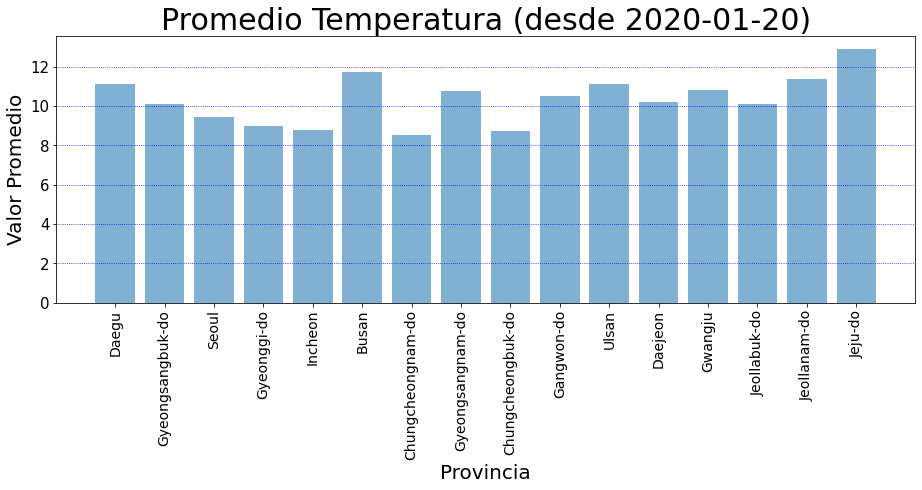

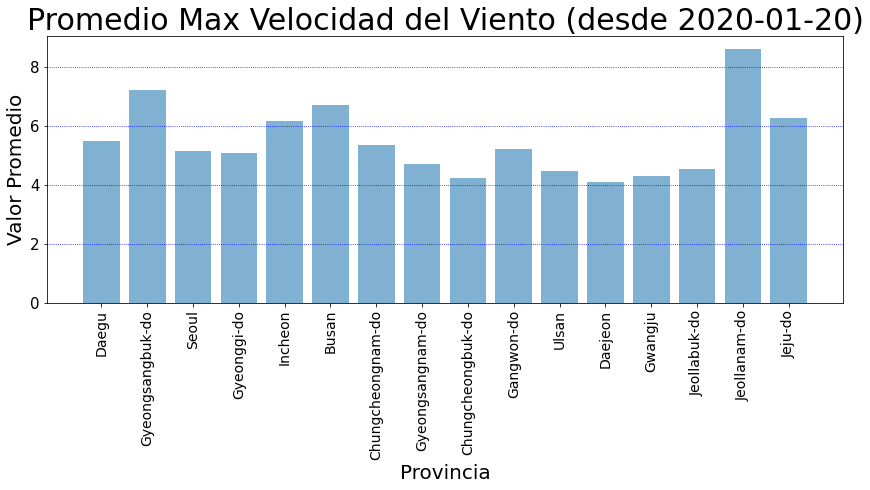

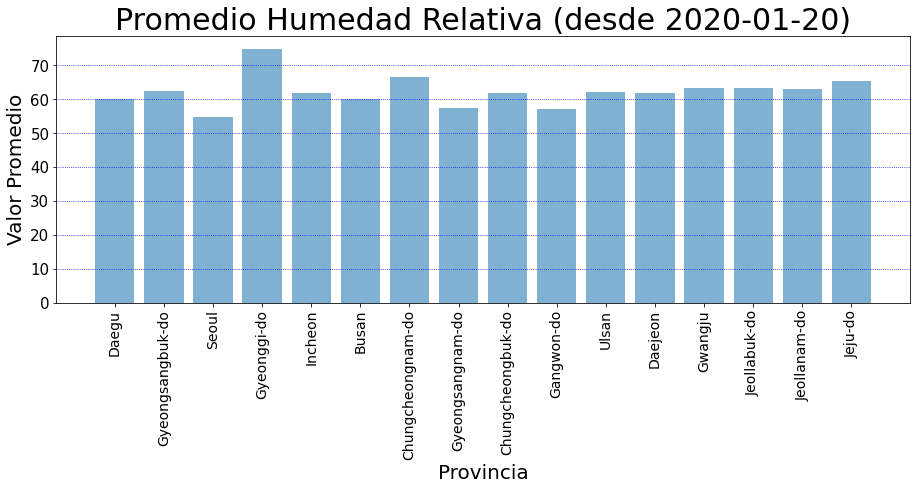

In [ ]:
# DATAFRAME CON LAS COLUMNAS: avg_temp, precipitation, max_wind_speed y avg_relative_humidity
# Nombre DATAFRAME:
tiempo_valor_covid = pd.DataFrame(
    [tiempo_estad_covid.index
     , tiempo_estad_covid['avg_temp']
     , tiempo_estad_covid['precipitation']
     , tiempo_estad_covid['max_wind_speed']
     , tiempo_estad_covid['avg_relative_humidity']]
    ).T
tiempo_valor_covid.columns = ['province', 'temperature', 'precipitation'
                       , 'max_wind_speed', 'relative_humidity']

# ORDENAMOS POR CASOS CONFIRMADOS - COGEMOS EL DATAFRAME PROVINCIAS QUE CONTIENE ESTE DATO
# NO TENEMOS EN CUENTA LA PRROVINCIA DE Sejong
sorter = list(provincias.province[provincias.province != 'Sejong'].values)
tiempo_valor_covid.province = tiempo_valor_covid.province.astype('category')
tiempo_valor_covid.province.cat.set_categories(sorter, inplace=True)
tiempo_valor_covid = tiempo_valor_covid.sort_values(['province'])
tiempo_valor_covid.index = range(len(tiempo_valor_covid.province.unique()))

# 3 GRÁFICOS
title_list = ['Promedio Temperatura', 'Promedio Max Velocidad del Viento', 'Promedio Humedad Relativa']
for col, title in zip(tiempo_valor_covid.columns[[1, 3, 4]], title_list):
    plt.figure(figsize=(13, 7))
    plt.title(f'{title} (desde 2020-01-20)', fontsize=30)
    plt.xticks(rotation=90)
    plt.xticks(size=14)
    plt.yticks(size=15)
    plt.bar(tiempo_valor_covid.province, tiempo_valor_covid[col], color=color_list[4])
    plt.xlabel('Provincia',size=20)
    plt.ylabel('Valor Promedio', size=20)
    plt.grid(axis='y',linestyle='dotted', color='b')
    plt.show()

1. **Temperatura**: correlación negativa débil en general (cuanto más frío, más casos)
2. **Velocidad máxima del viento**: correlación positiva más débil (cuanto más viento, más casos) - excepto las dos últimas regiones
3. **Humedad**: poca o ninguna correlación


# 7.ANÁLISIS POR PACIENTES

En este apartado vamos a analizar los datos epidemiológicos por Pacientes. Disponemos del dataframe **pacientes_temp**, que corresponden a **134** días, y que van desde **2016-01-20** a **2020-06-01**.

CARGAMOS el Fichero **PatientInfo.csv**

In [ ]:
# CARGAMOS LOS DATOS DESDE EL FICHERO PatientInfo.csv
from google.colab import files

uploaded = files.upload()

for PatientInfo in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=PatientInfo, length=len(uploaded[PatientInfo])))

Saving PatientInfo.csv to PatientInfo.csv
User uploaded file "PatientInfo.csv" with length 427357 bytes


In [ ]:
# CARGAMOS LOS DATOS AL DATAFRAME pacientes_temp
import pandas as pd
import io
pacientes_temp = pd.read_csv(io.StringIO(uploaded[PatientInfo].decode('utf-8')))
pacientes_temp

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18,NaN,2020-04-03,2020-04-21,NaN,released
4000,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7000000009,5,NaN,2020-04-03,NaN,NaN,isolated
4001,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9,NaN,2020-04-03,2020-05-05,NaN,released
4002,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6,NaN,2020-04-14,2020-04-26,NaN,released


## CONSTRUCCIÓN DE LOS DATOS

In [ ]:
# CALCULO DE Nº TOTAL DE CASOS CONFIRMADOS - LO HAREMOS DEL DATAFRAME test_temp
confirmed_total = test_temp.confirmed.iloc[-1]
print(f'NÚMERO DE CASOS CONFIRMADOS', confirmed_total)
# CÁLCULO DE PORCENTAJES
len(pacientes_temp), confirmed_total, len(pacientes_temp)/confirmed_total *100

NÚMERO DE CASOS CONFIRMADOS 11468


(4004, 11468, 34.91454482036973)

El Nº Total de casos confirmados es de **11.468**, pero en cambio, en el dataframe de **pacientes_temp** sólo tenemos datos de **4.004** pacientes (35%). Es decir, el **65%** de los casos confirmados, no están documentados

## ANALÍTICA DESCRIPTIVA

#### **Pacientes por Sexo**

A simple vista vemos que hay valores **NaN**, por lo tanto, antes de hacer cualquier cálculo o análisis, vamos identificar estos valores, para no tenerlos en cuenta

**DATOS BÄSICOS**

In [ ]:
print('VALORES DE LA COLUMNA sex:', pacientes_temp.sex.unique())
print('TOTAL DE VALORES NaN:', pacientes_temp.sex.isna().sum())
print('VALORES DE LA COLUMNA sex:', pacientes_temp.sex.count())
pacientes_temp.sex.value_counts()

VALORES DE LA COLUMNA sex: ['male' 'female' nan]
TOTAL DE VALORES NaN: 330
VALORES DE LA COLUMNA sex: 3674


female    2021
male      1653
Name: sex, dtype: int64

Creamos el dataset **sexos_distrib**, con el Nº de pacientes por sexo, excluyendo las filas con valores **NaN**

In [ ]:
sexos_distrib = pacientes_temp[['patient_id', 'sex']].groupby('sex', as_index=False).count()
sexos_distrib.columns = ['sex', 'confirmed']
sexos_distrib

,sex,confirmed
0,female,2021
1,male,1653


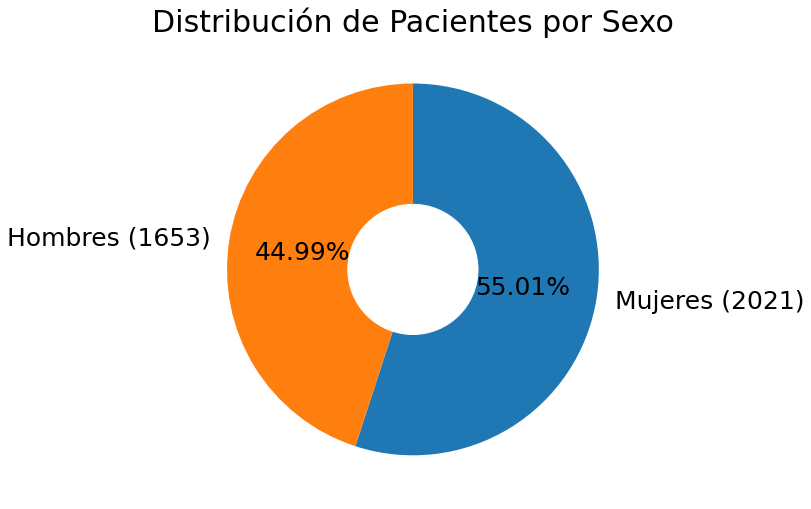

In [ ]:
# GRÁFICO DE PACIENTES POR SEXO
fig, ax = plt.subplots(figsize=(11, 11))
plt.title('Distribución de Pacientes por Sexo', fontsize=30)
pop_circle=plt.Circle((0,0), 0.35, color='white')

plt.pie(sexos_distrib.confirmed
        , labels=[f'Mujeres ({sexos_distrib.confirmed[0]})', f'Hombres ({sexos_distrib.confirmed[1]})']
        , autopct='%.2f%%'
        , startangle=90
        , counterclock=False
        , textprops={'fontsize': 25}
        )
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()